In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from matplotlib.lines import Line2D 
from scipy.stats import norm

In [18]:
def plot_mse(df_mse, UorV=['U'], kernel=['rbf'], estimator=['ipr', 'nrm'], col="facet_blocks", col_wrap=3):
    g = sns.catplot(data=df_mse[(df_mse['kernel'].isin(kernel)) & (df_mse['type'].isin(UorV)) & (df_mse['estimator'].isin(estimator))],
        x="x",   
        y="MSE", 
        hue="method_name",
        palette='tab20', 
        col=col, 
        kind="bar",
        height=4,
        aspect=1.2,
        sharey=False,
        sharex=False,
        col_wrap=col_wrap
    )
    g.set_titles("{col_name}")
    plt.show()

# RESULTS

## Standard comparison

In [19]:
df_mse = pd.read_csv('results/results_standard_mse_nrm.csv', index_col=0)

### Figure 1

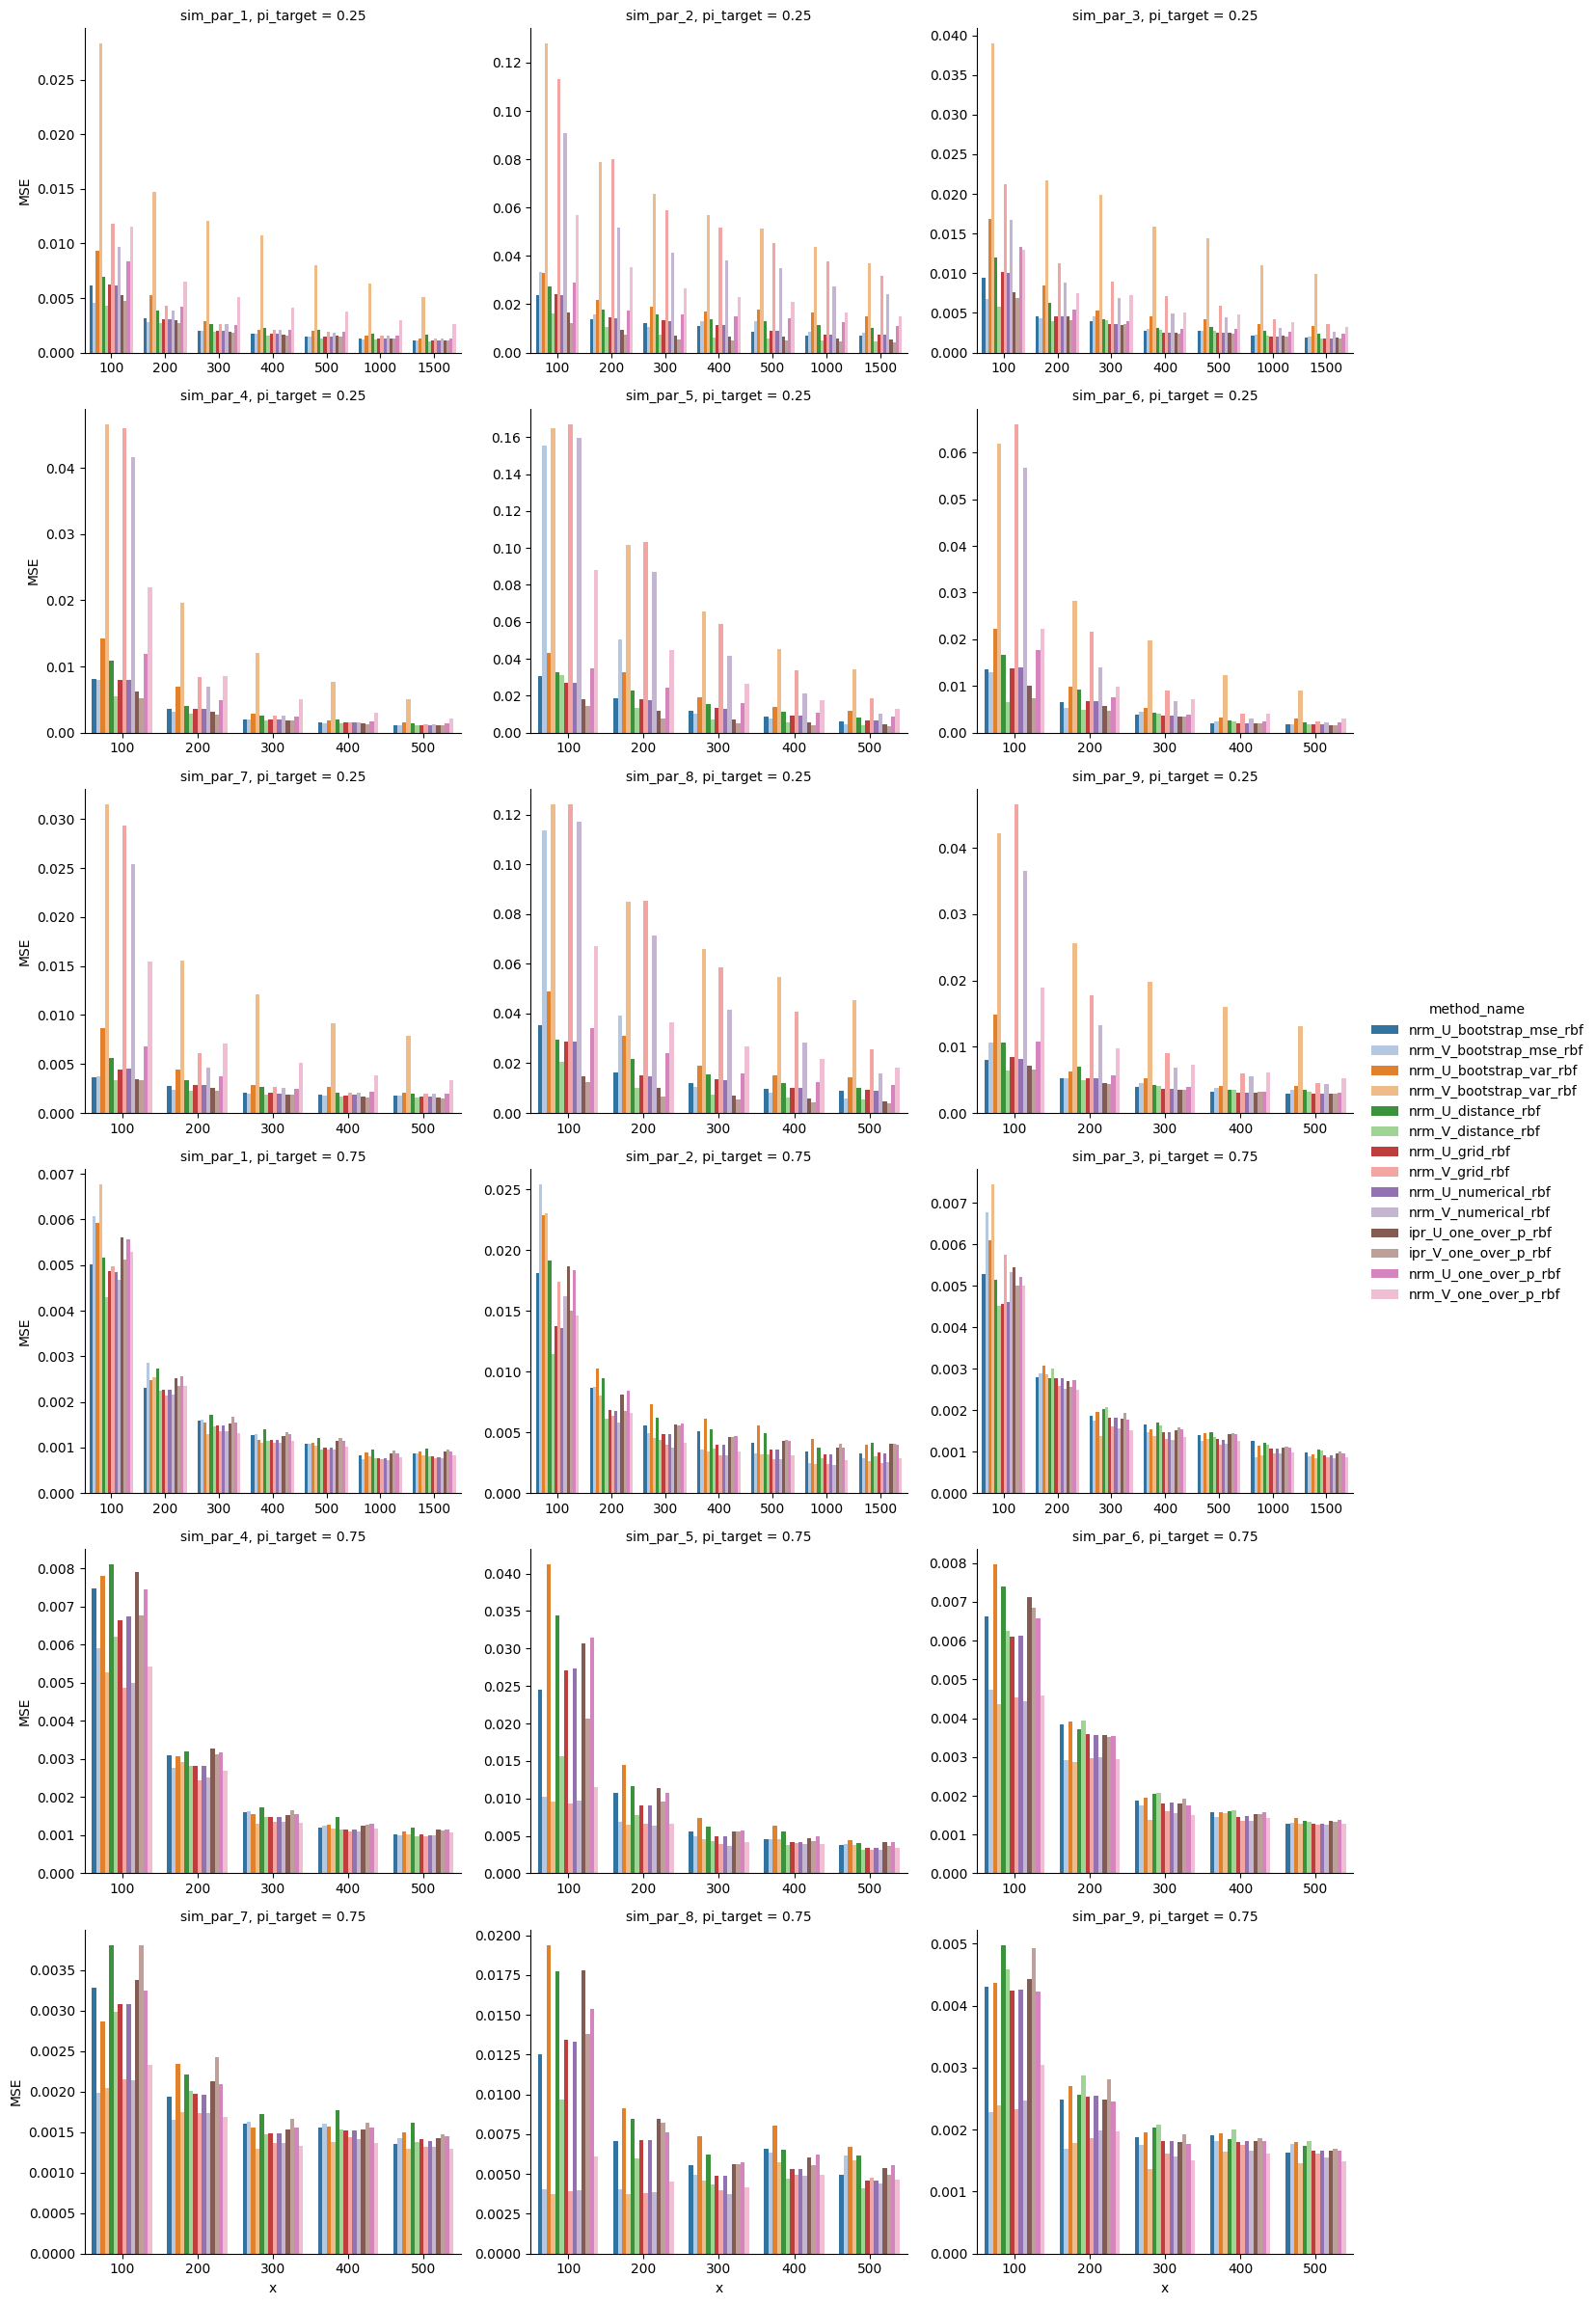

In [20]:
plot_mse(df_mse, ['U', 'V'], ['rbf'], ['ipr', 'nrm'])

### Figure 1A (NRM)

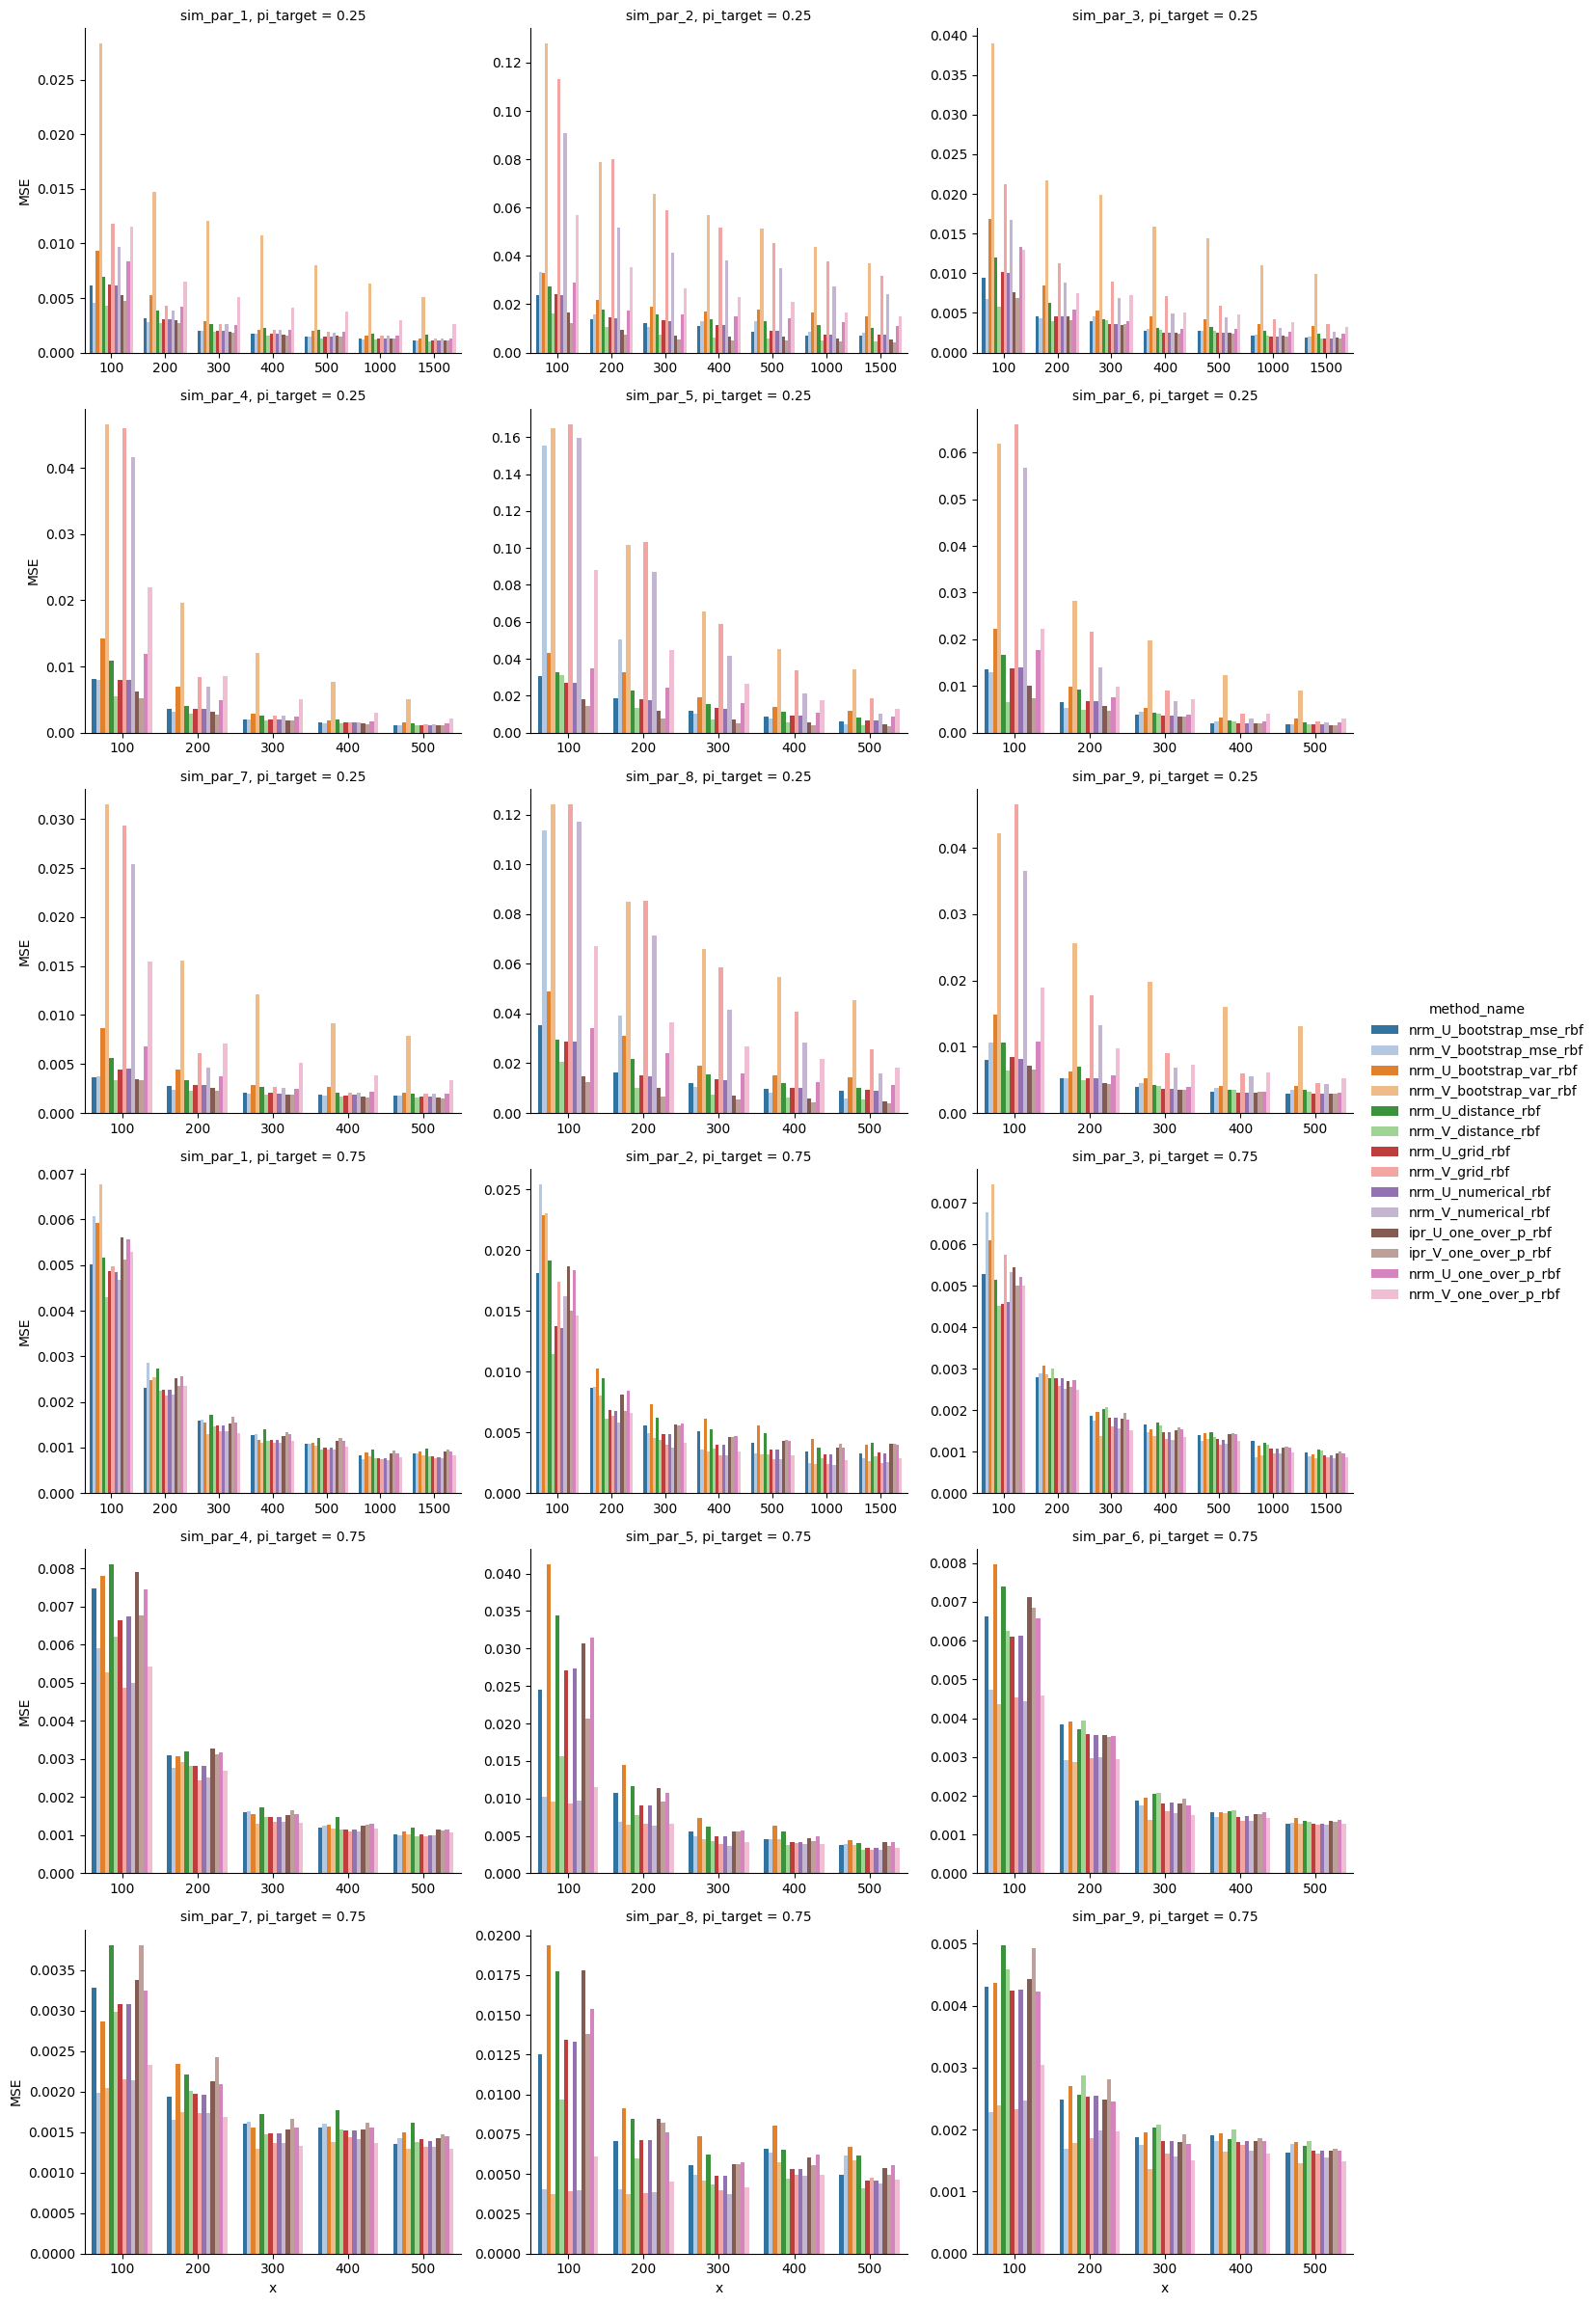

In [21]:
df_mse_nrm = pd.read_csv('results/results_standard_mse_nrm.csv', index_col=0)
plot_mse(df_mse_nrm, ['U', 'V'], ['rbf'], ['ipr', 'nrm'])

### Figure 2

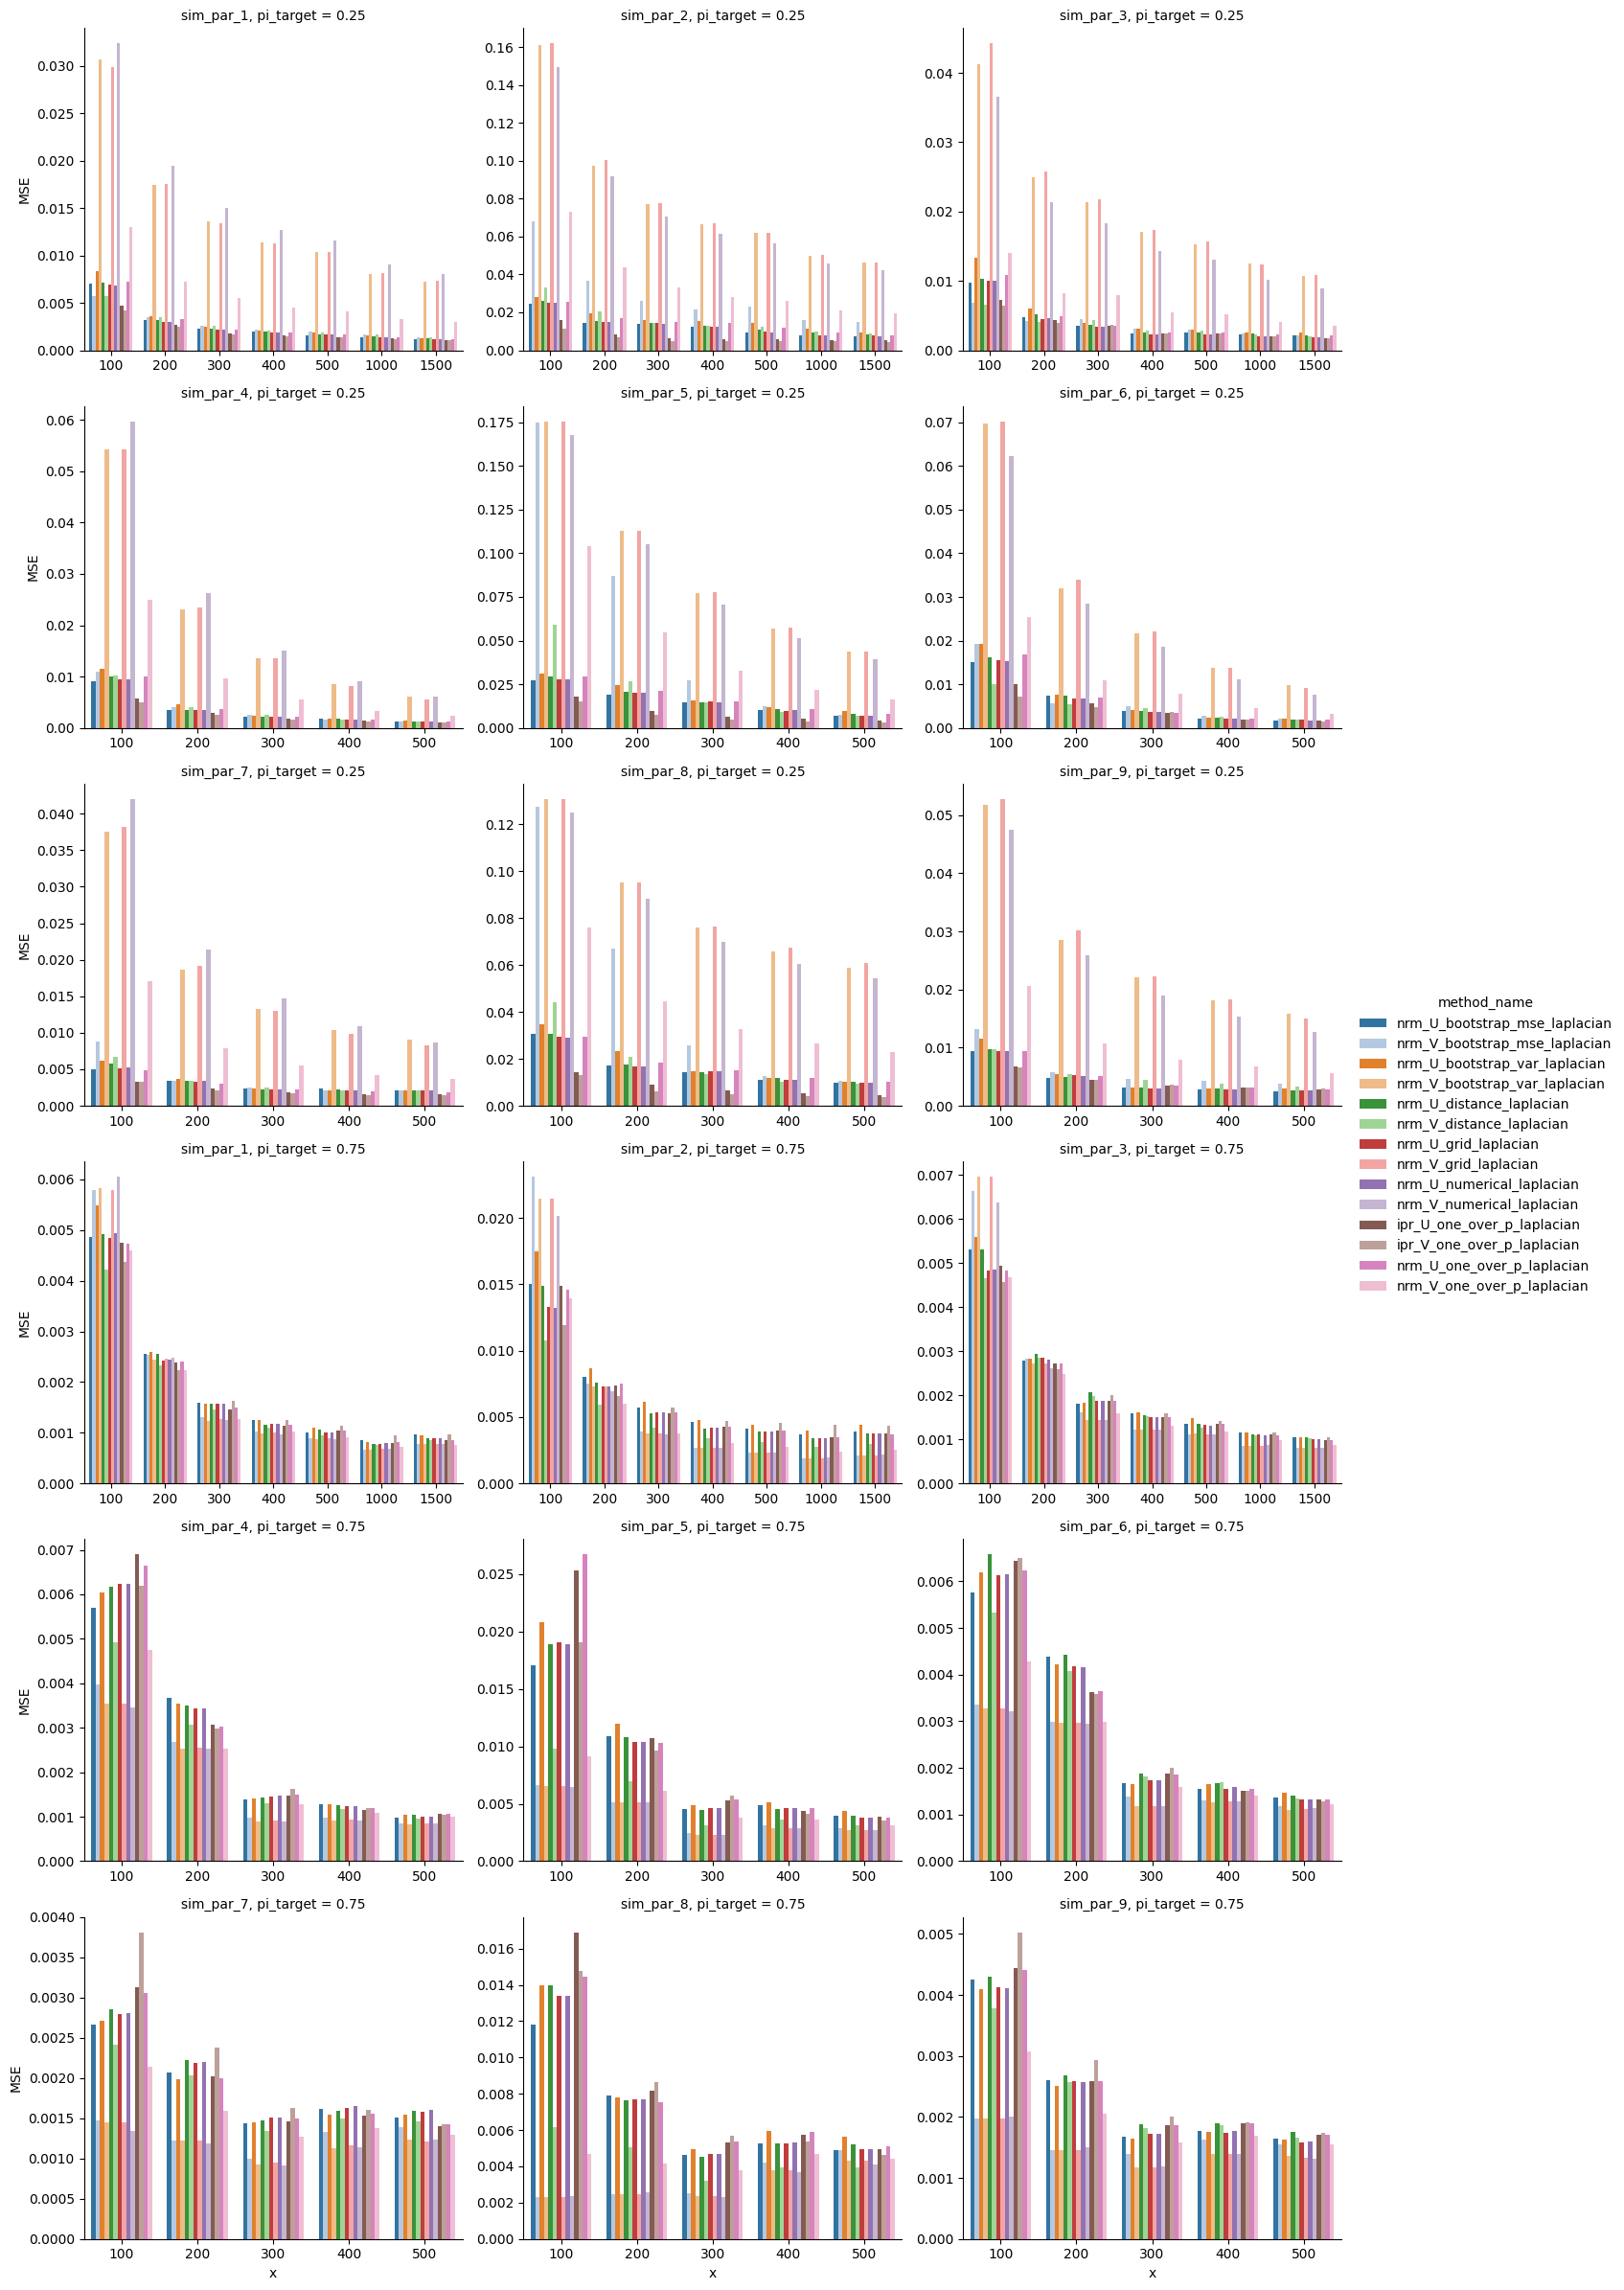

In [22]:
plot_mse(df_mse, ['U', 'V'], ['laplacian'], ['ipr', 'nrm'])

### Figure 3

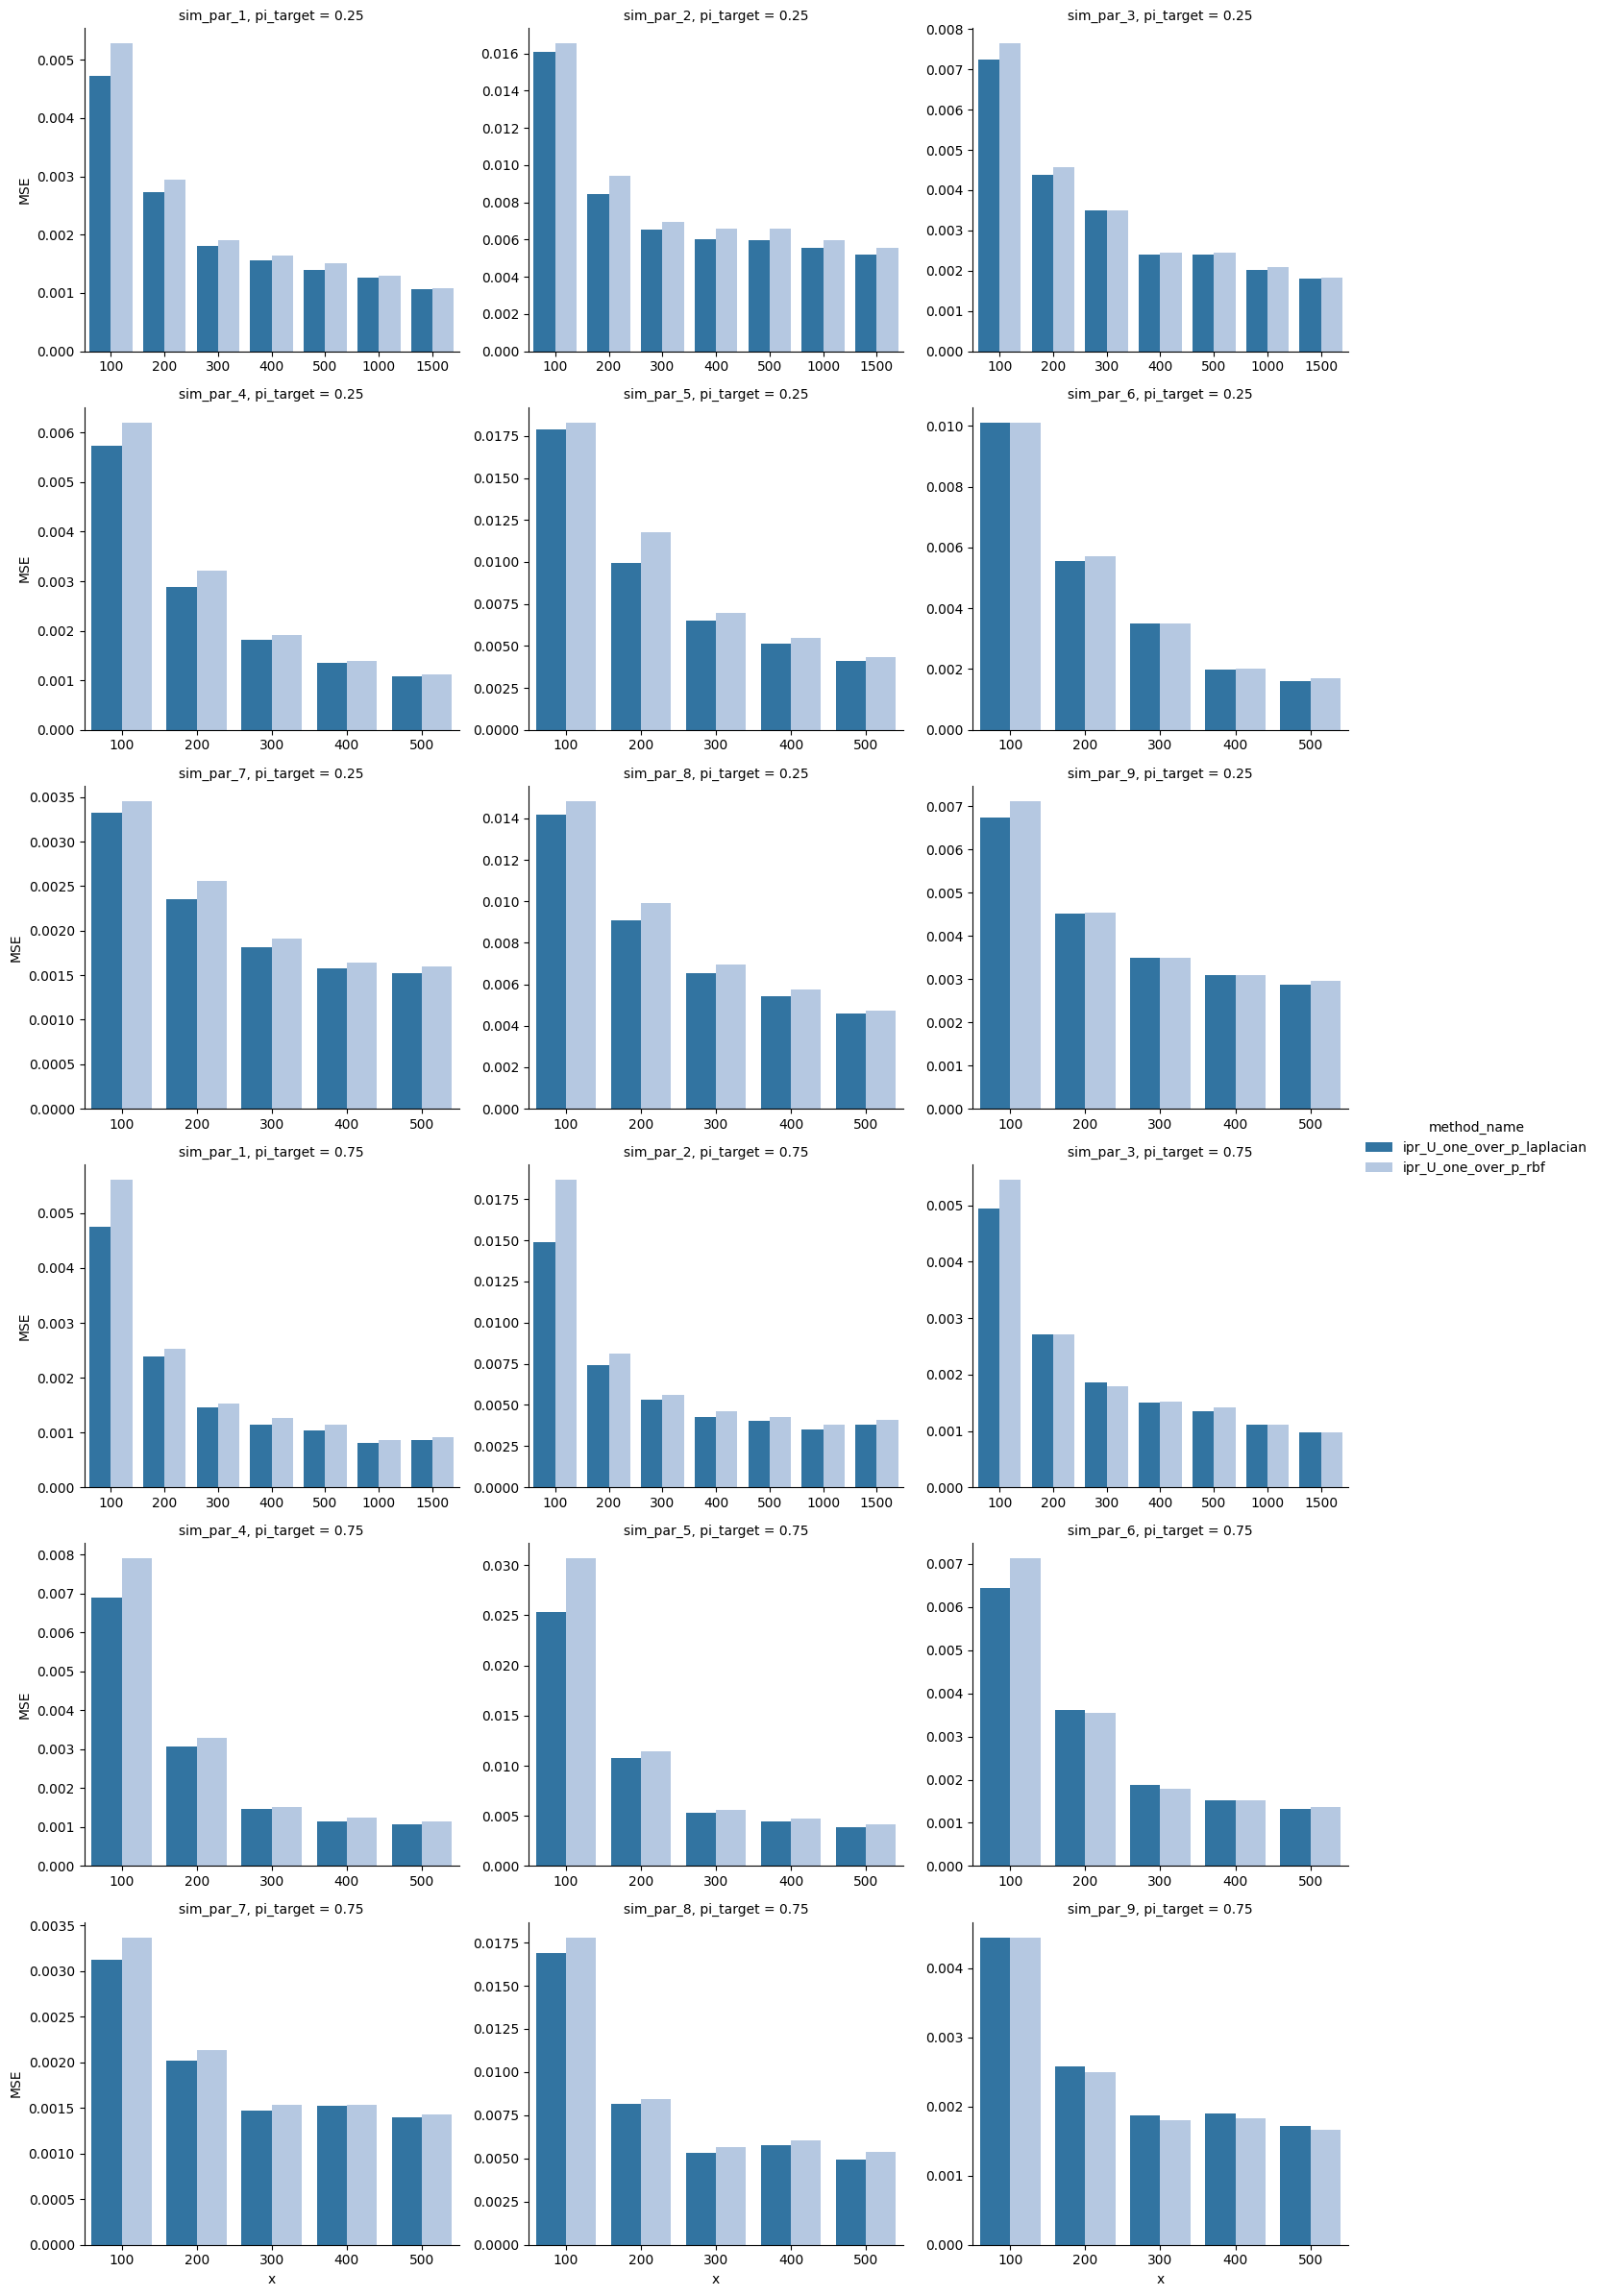

In [23]:
plot_mse(df_mse, ['U'], ['rbf', 'laplacian'], ['ipr'])

### Figure 4

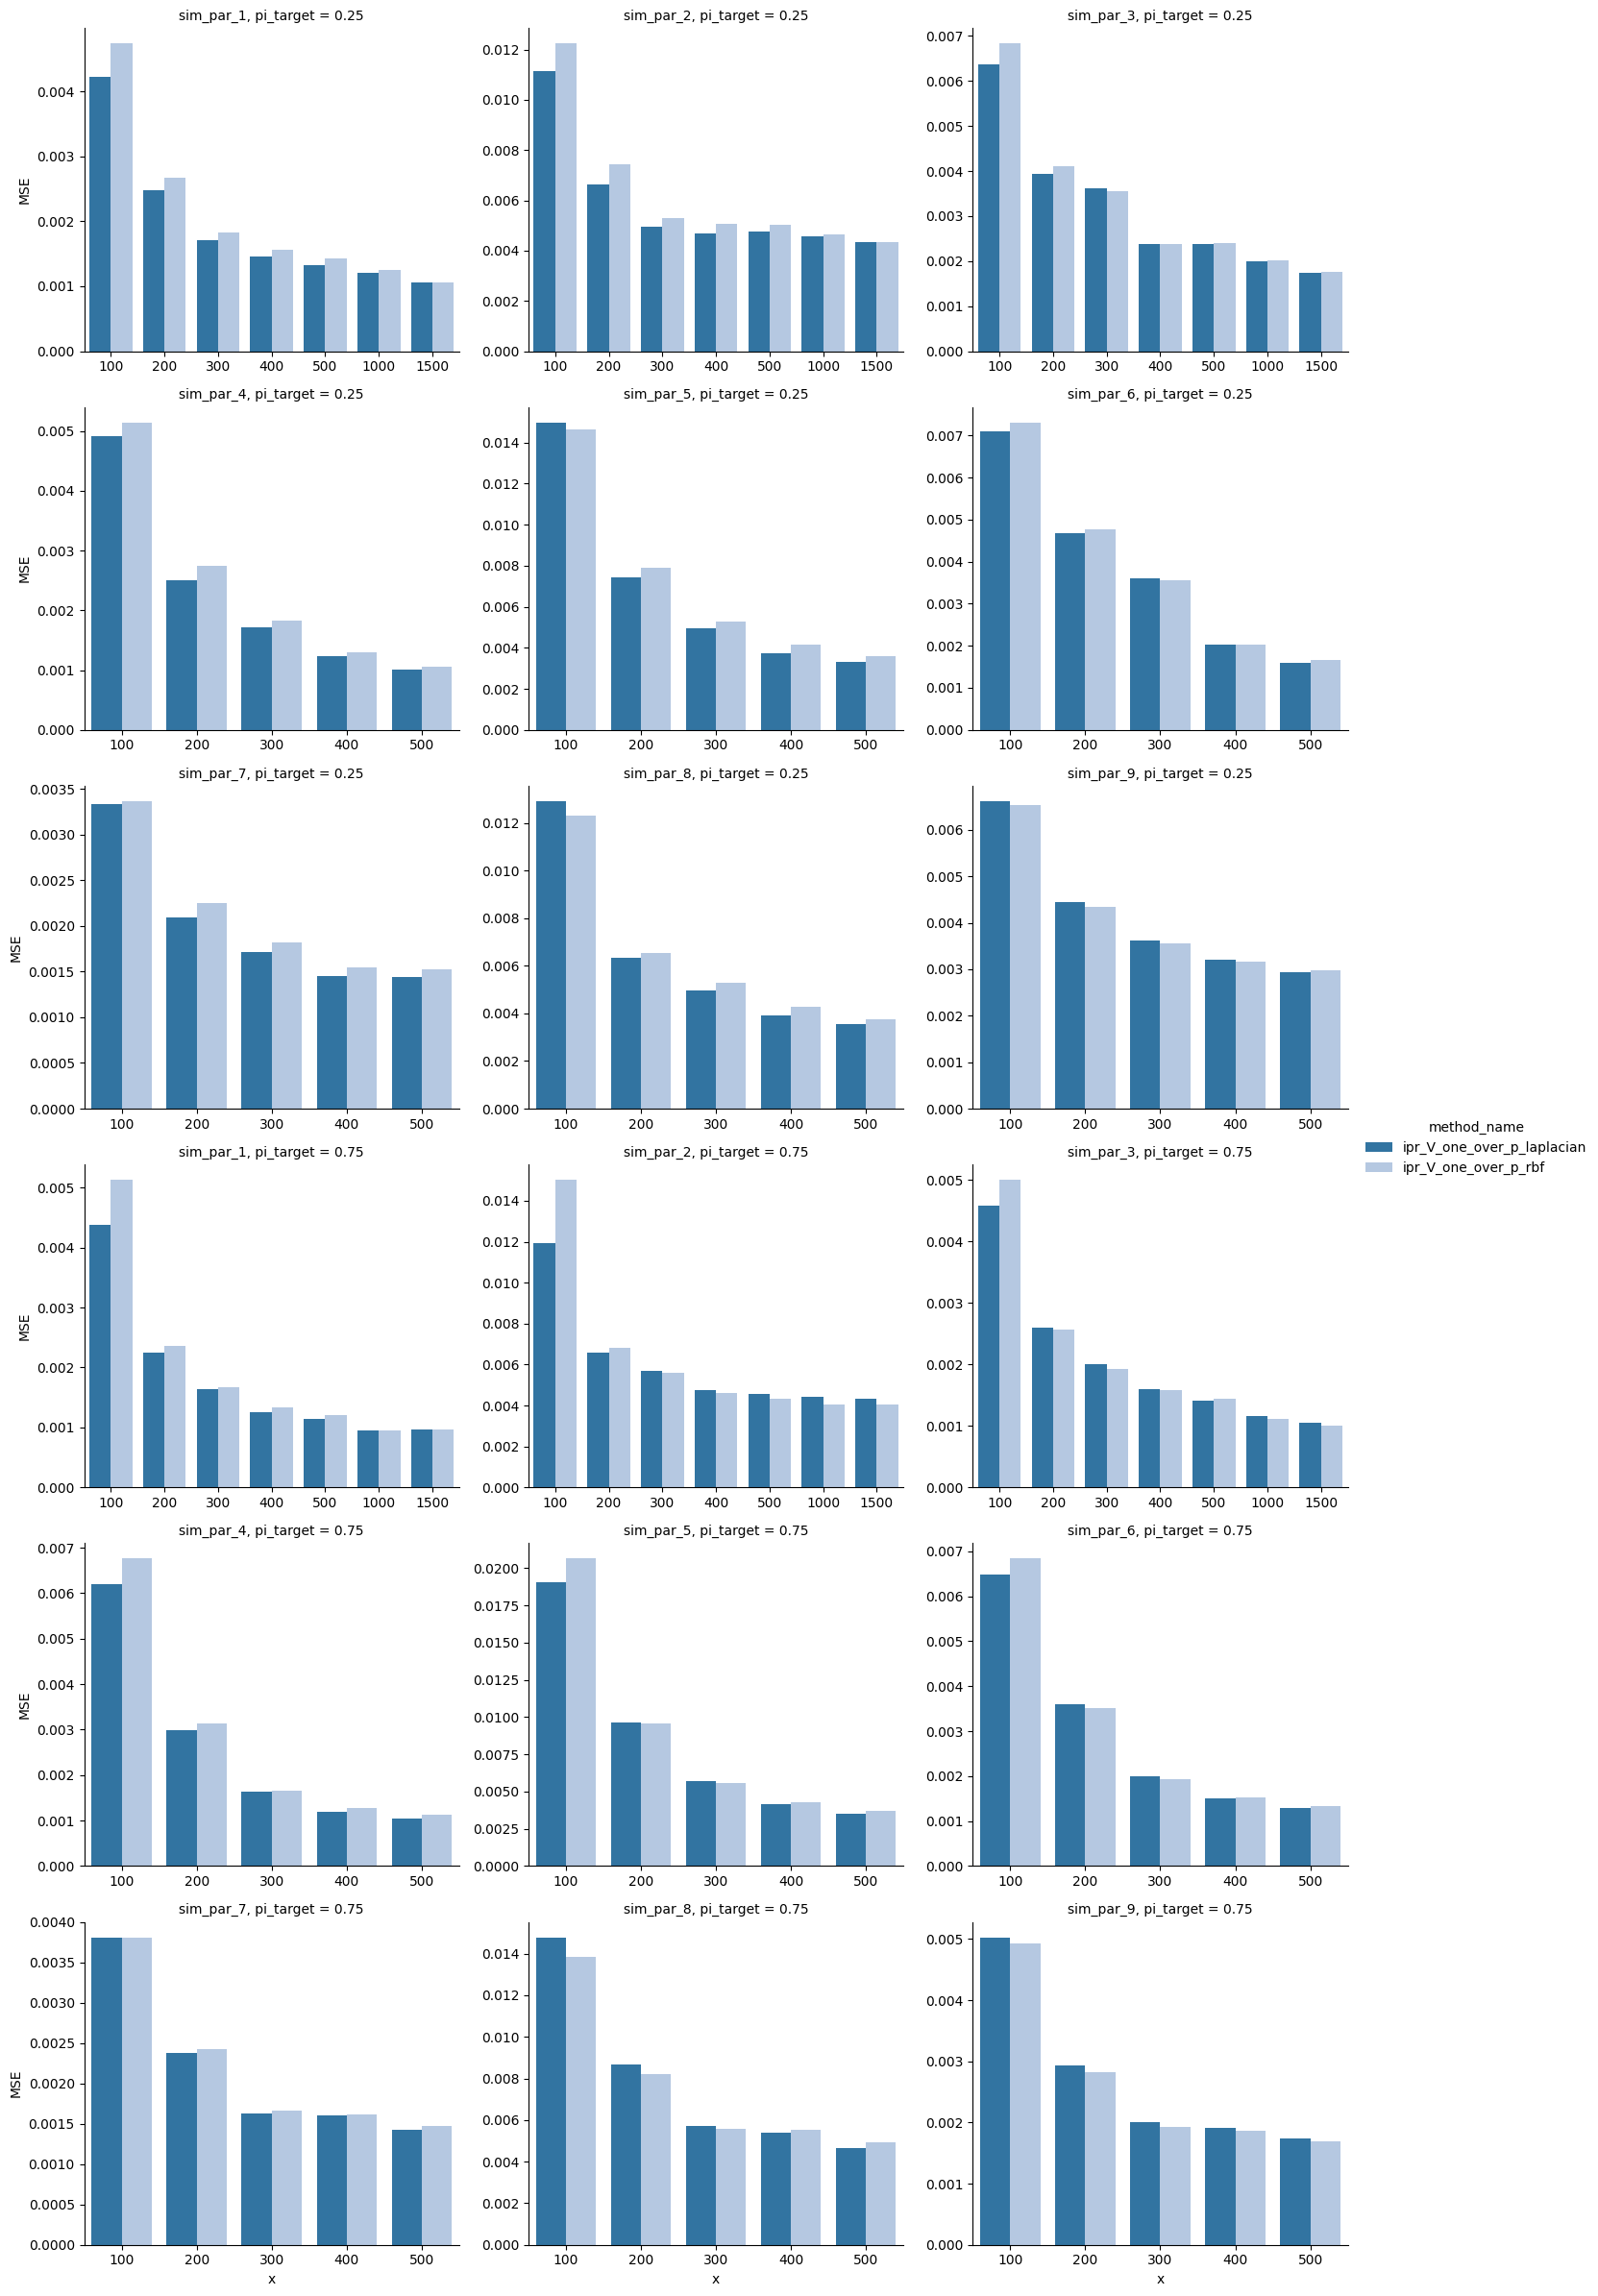

In [24]:
plot_mse(df_mse, ['V'], ['rbf', 'laplacian'], ['ipr'])

### Table 1

In [25]:
df_mse = pd.read_csv('results/results_standard_mse.csv', index_col=0)

In [26]:
df_mse_tmp = copy.copy(df_mse)
df_mse_tmp = df_mse_tmp.loc[df_mse_tmp['n_target'] <= 500,:]

In [27]:
df_mse_tmp['rank']=df_mse_tmp.groupby(['sim_scenario','n_plus','n_minus','n_target','pi_target']).rank(method='dense', ascending=True)['MSE']

In [28]:
df_mse_tmp[['method_name', 'rank', 'count_sim']].groupby(['method_name']).agg('mean').reset_index().sort_values('rank').reset_index(drop=True)

,method_name,rank,count_sim
0,ipr_U_numerical_rbf,10.388889,100.000000
1,ipr_U_grid_rbf,10.877778,100.000000
2,ipr_V_distance_laplacian,14.777778,100.000000
3,ipr_V_distance_rbf,14.811111,100.000000
4,ipr_V_one_over_p_laplacian,15.211111,100.000000
5,ipr_U_grid_laplacian,15.600000,100.000000
6,ipr_U_numerical_laplacian,15.611111,100.000000
7,ipr_U_one_over_p_laplacian,16.688889,100.000000
8,nrm_V_distance_rbf,17.366667,100.000000
9,ipr_U_bootstrap_mse_rbf,18.011111,100.000000


### Tables 2 and 3

In [30]:
df_tmp = df_mse_tmp[['method_name', 'pi_target', 'rank', 'count_sim']].groupby(['method_name', 'pi_target']).agg('mean').reset_index().sort_values('rank').reset_index(drop=True)

In [31]:
df_tmp[df_tmp['pi_target'] == 0.25]

,method_name,pi_target,rank,count_sim
0,ipr_V_one_over_p_laplacian,0.25,4.955556,100.0
4,ipr_U_numerical_rbf,0.25,6.066667,100.0
6,ipr_U_grid_rbf,0.25,6.688889,100.0
8,ipr_V_distance_laplacian,0.25,7.755556,100.0
9,ipr_V_one_over_p_rbf,0.25,8.200000,100.0
12,ipr_U_numerical_laplacian,0.25,9.822222,100.0
13,ipr_V_distance_rbf,0.25,9.844444,100.0
14,ipr_V_numerical_rbf,0.25,9.977778,100.0
15,ipr_U_grid_laplacian,0.25,10.311111,100.0
17,ipr_U_one_over_p_laplacian,0.25,11.311111,100.0


In [32]:
df_tmp[df_tmp['pi_target'] == 0.75]

,method_name,pi_target,rank,count_sim
1,nrm_V_numerical_laplacian,0.75,5.622222,76.488889
2,nrm_V_one_over_p_laplacian,0.75,5.688889,100.000000
3,nrm_V_bootstrap_var_laplacian,0.75,5.911111,76.488889
5,nrm_V_grid_laplacian,0.75,6.222222,76.488889
7,nrm_V_numerical_rbf,0.75,7.288889,100.000000
10,nrm_V_grid_rbf,0.75,8.622222,100.000000
11,nrm_V_bootstrap_mse_laplacian,0.75,8.711111,76.488889
16,nrm_V_one_over_p_rbf,0.75,10.355556,100.000000
19,nrm_V_distance_laplacian,0.75,13.111111,76.488889
21,nrm_V_bootstrap_var_rbf,0.75,14.666667,100.000000


### Figure 5

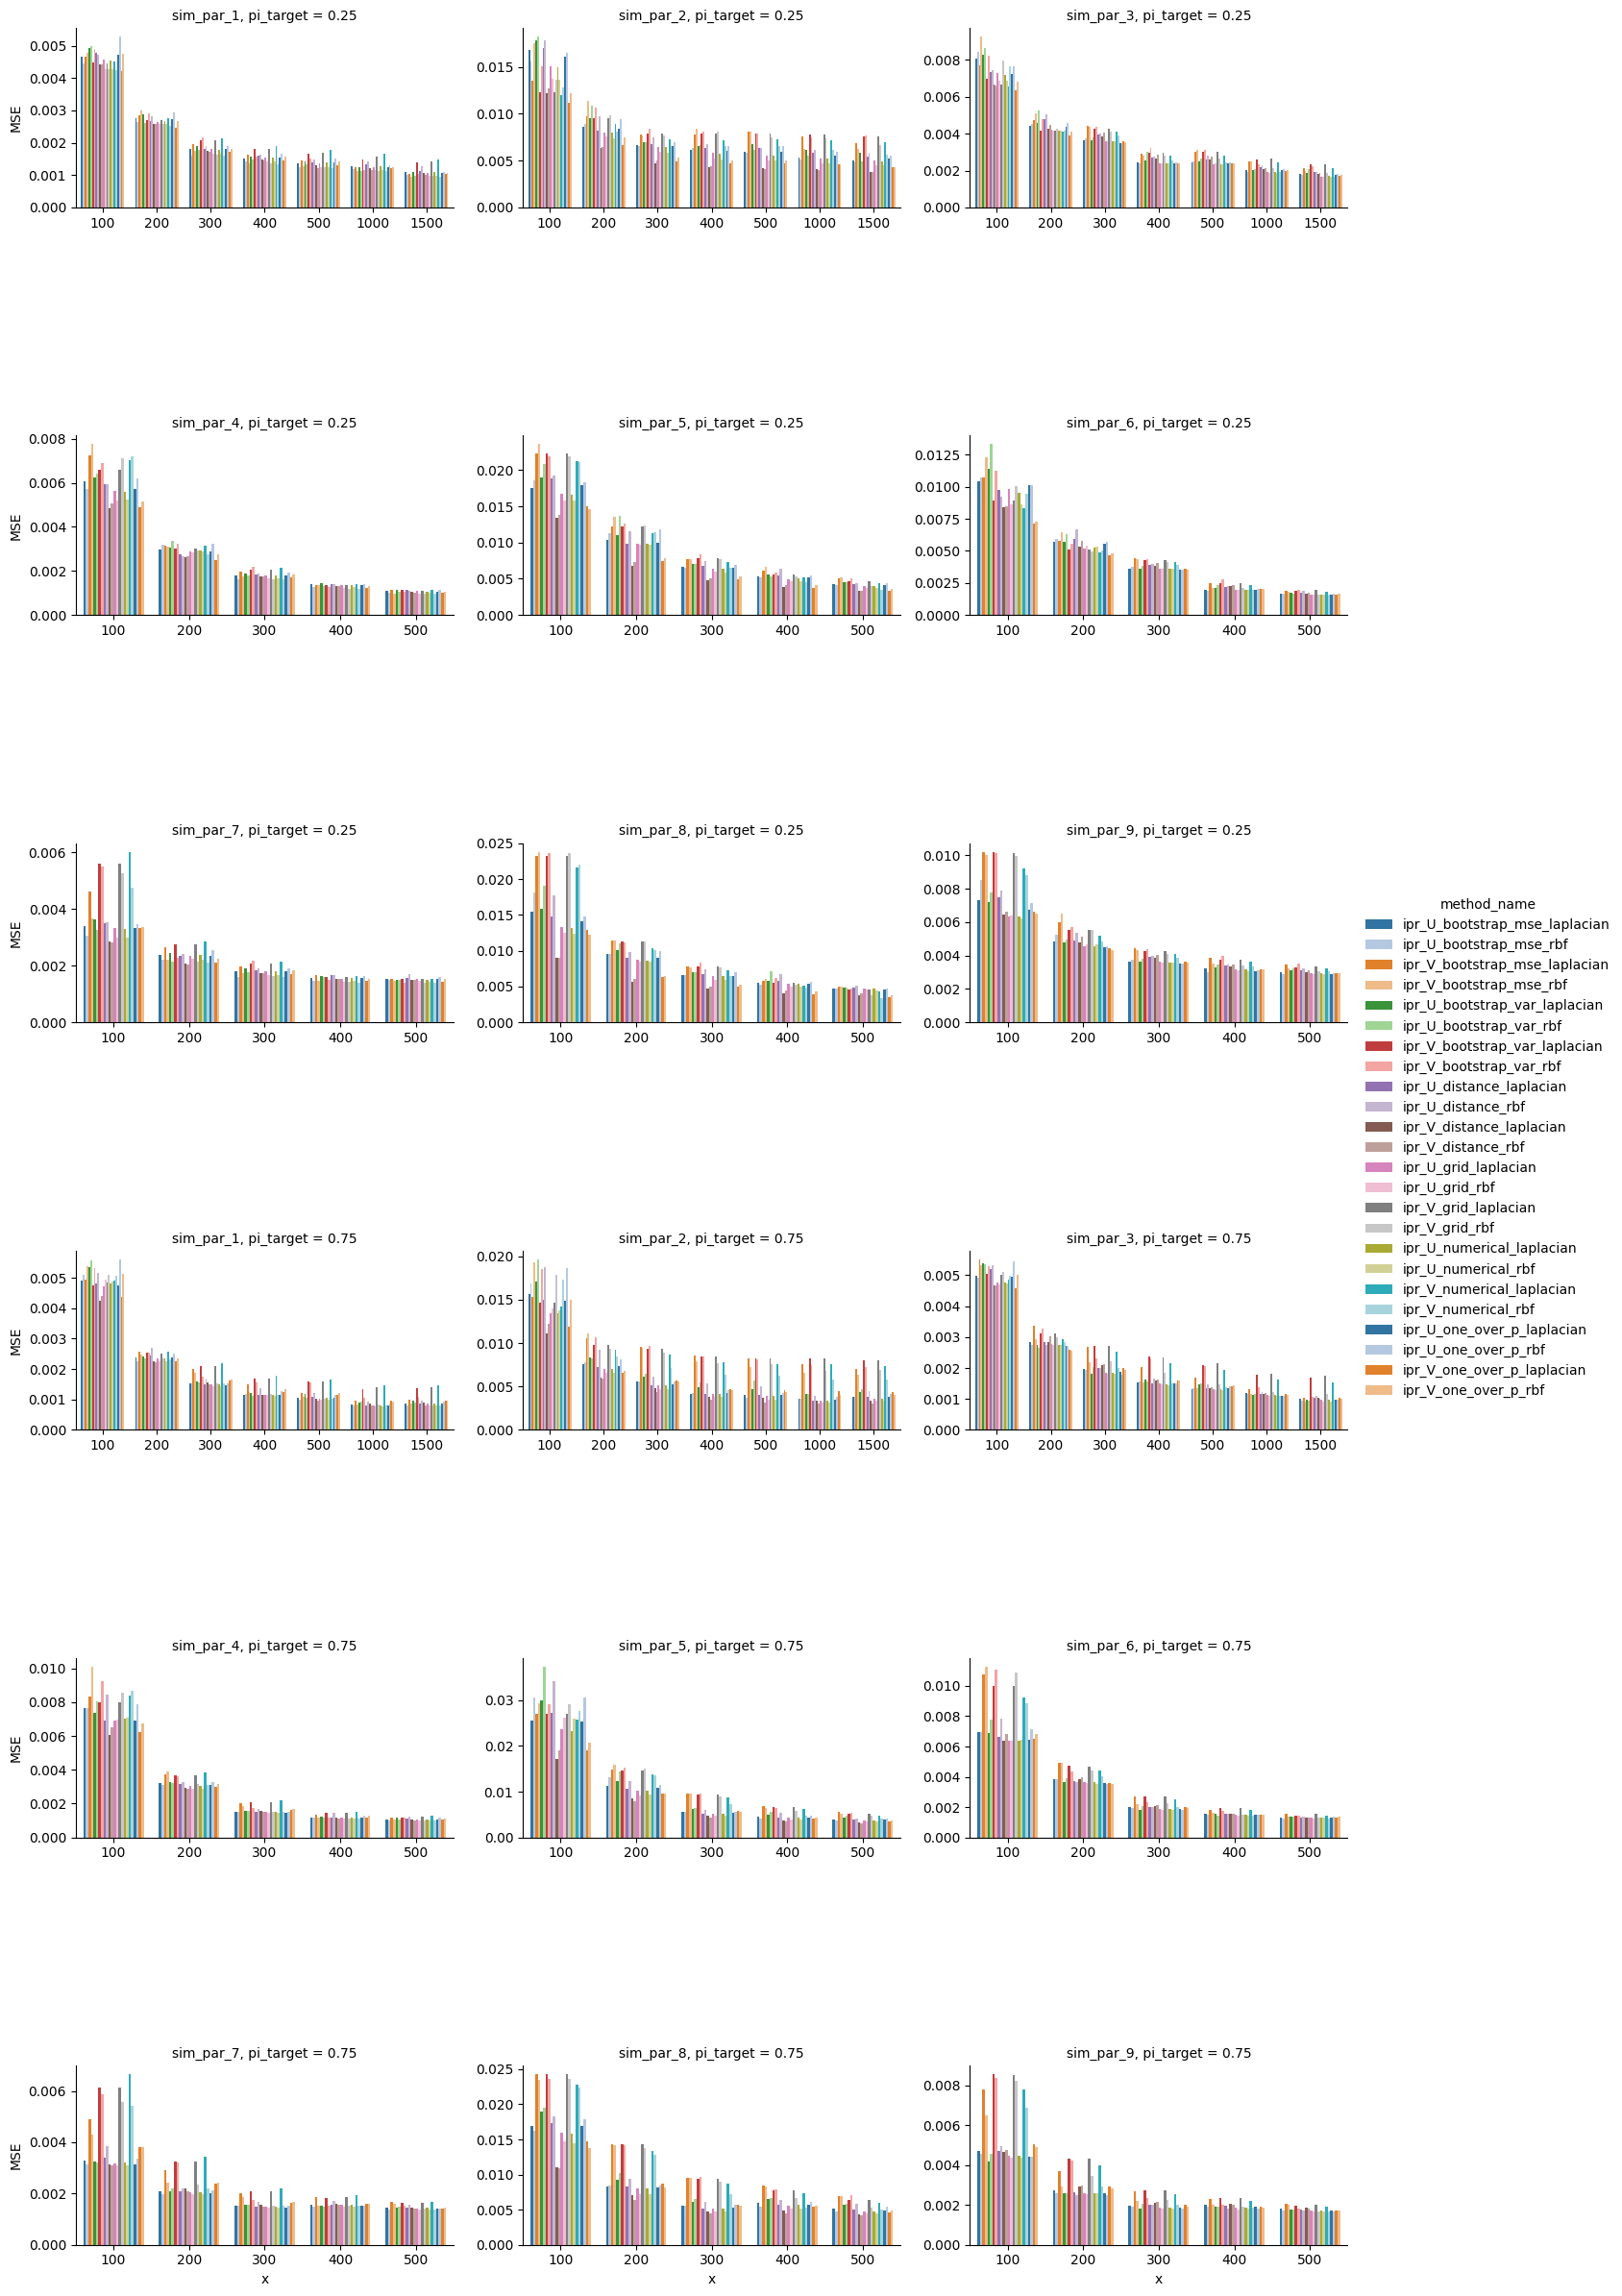

In [11]:
plot_mse(df_mse, ['U', 'V'], ['rbf', 'laplacian'], ['ipr'])

## Dimension

In [12]:
df_mse = pd.read_csv('results/results_dimension_mse.csv', index_col=0)

### Figure 6

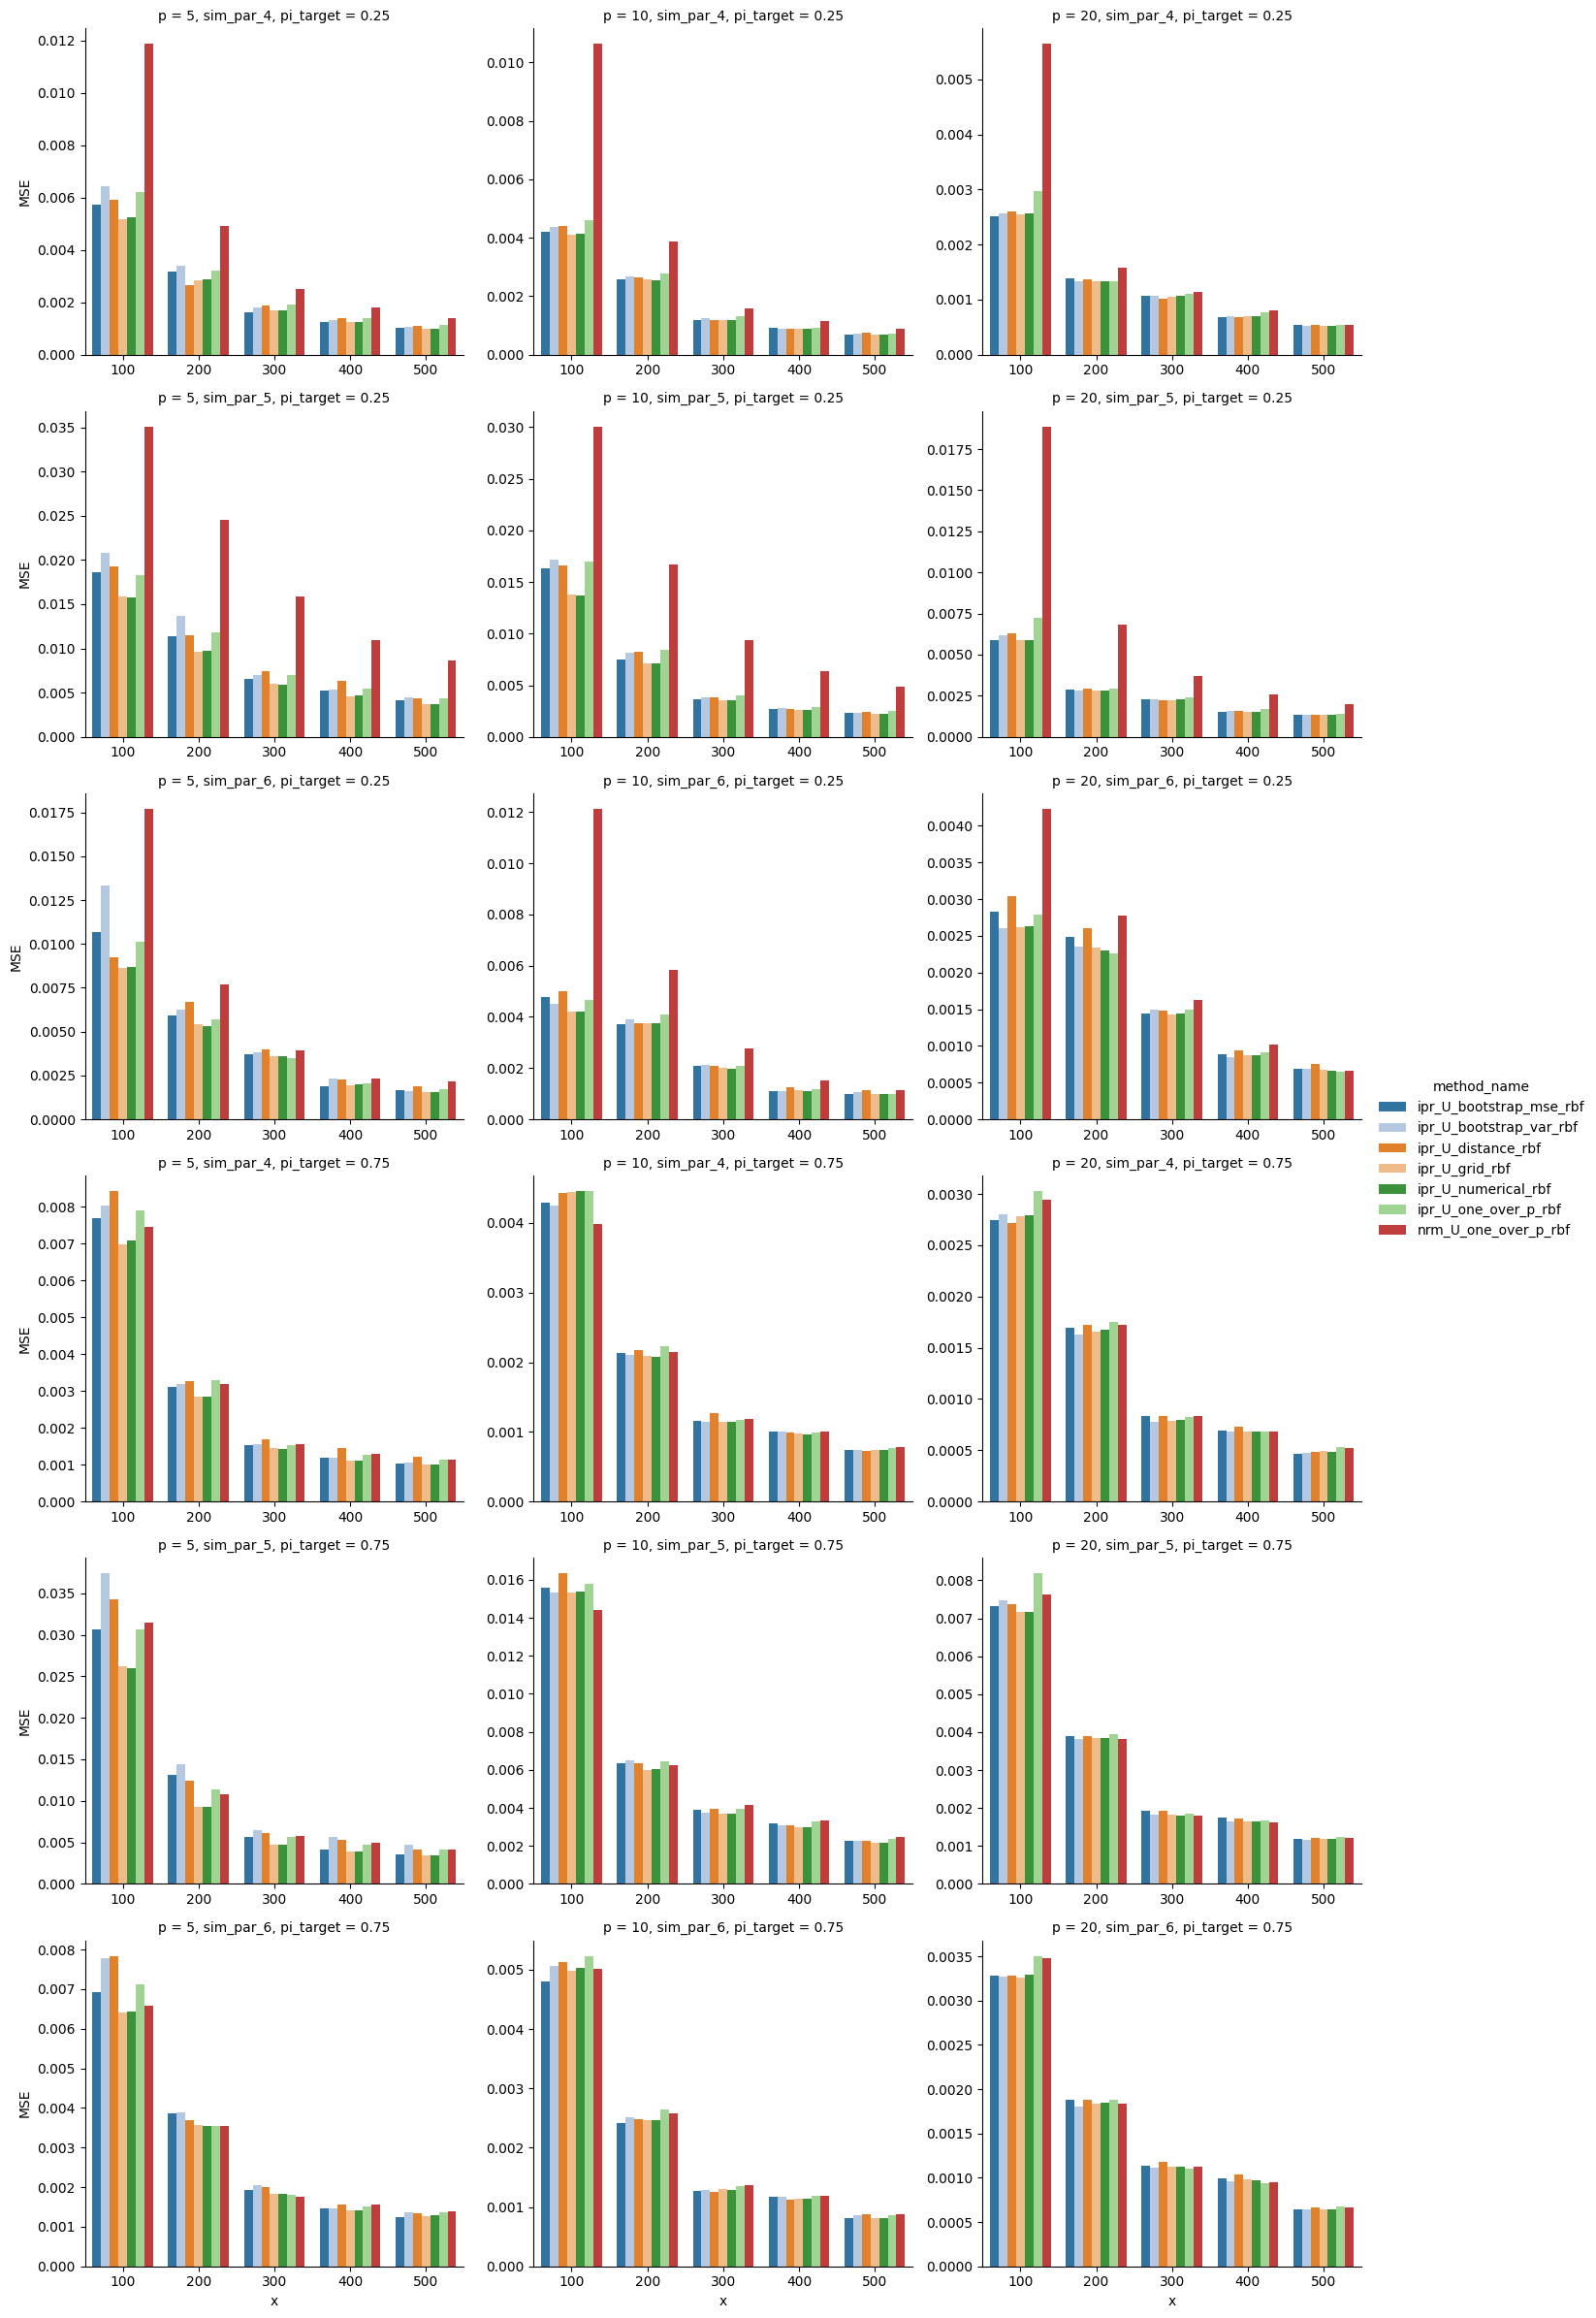

In [13]:
plot_mse(df_mse, ['U'])

### Figure 7

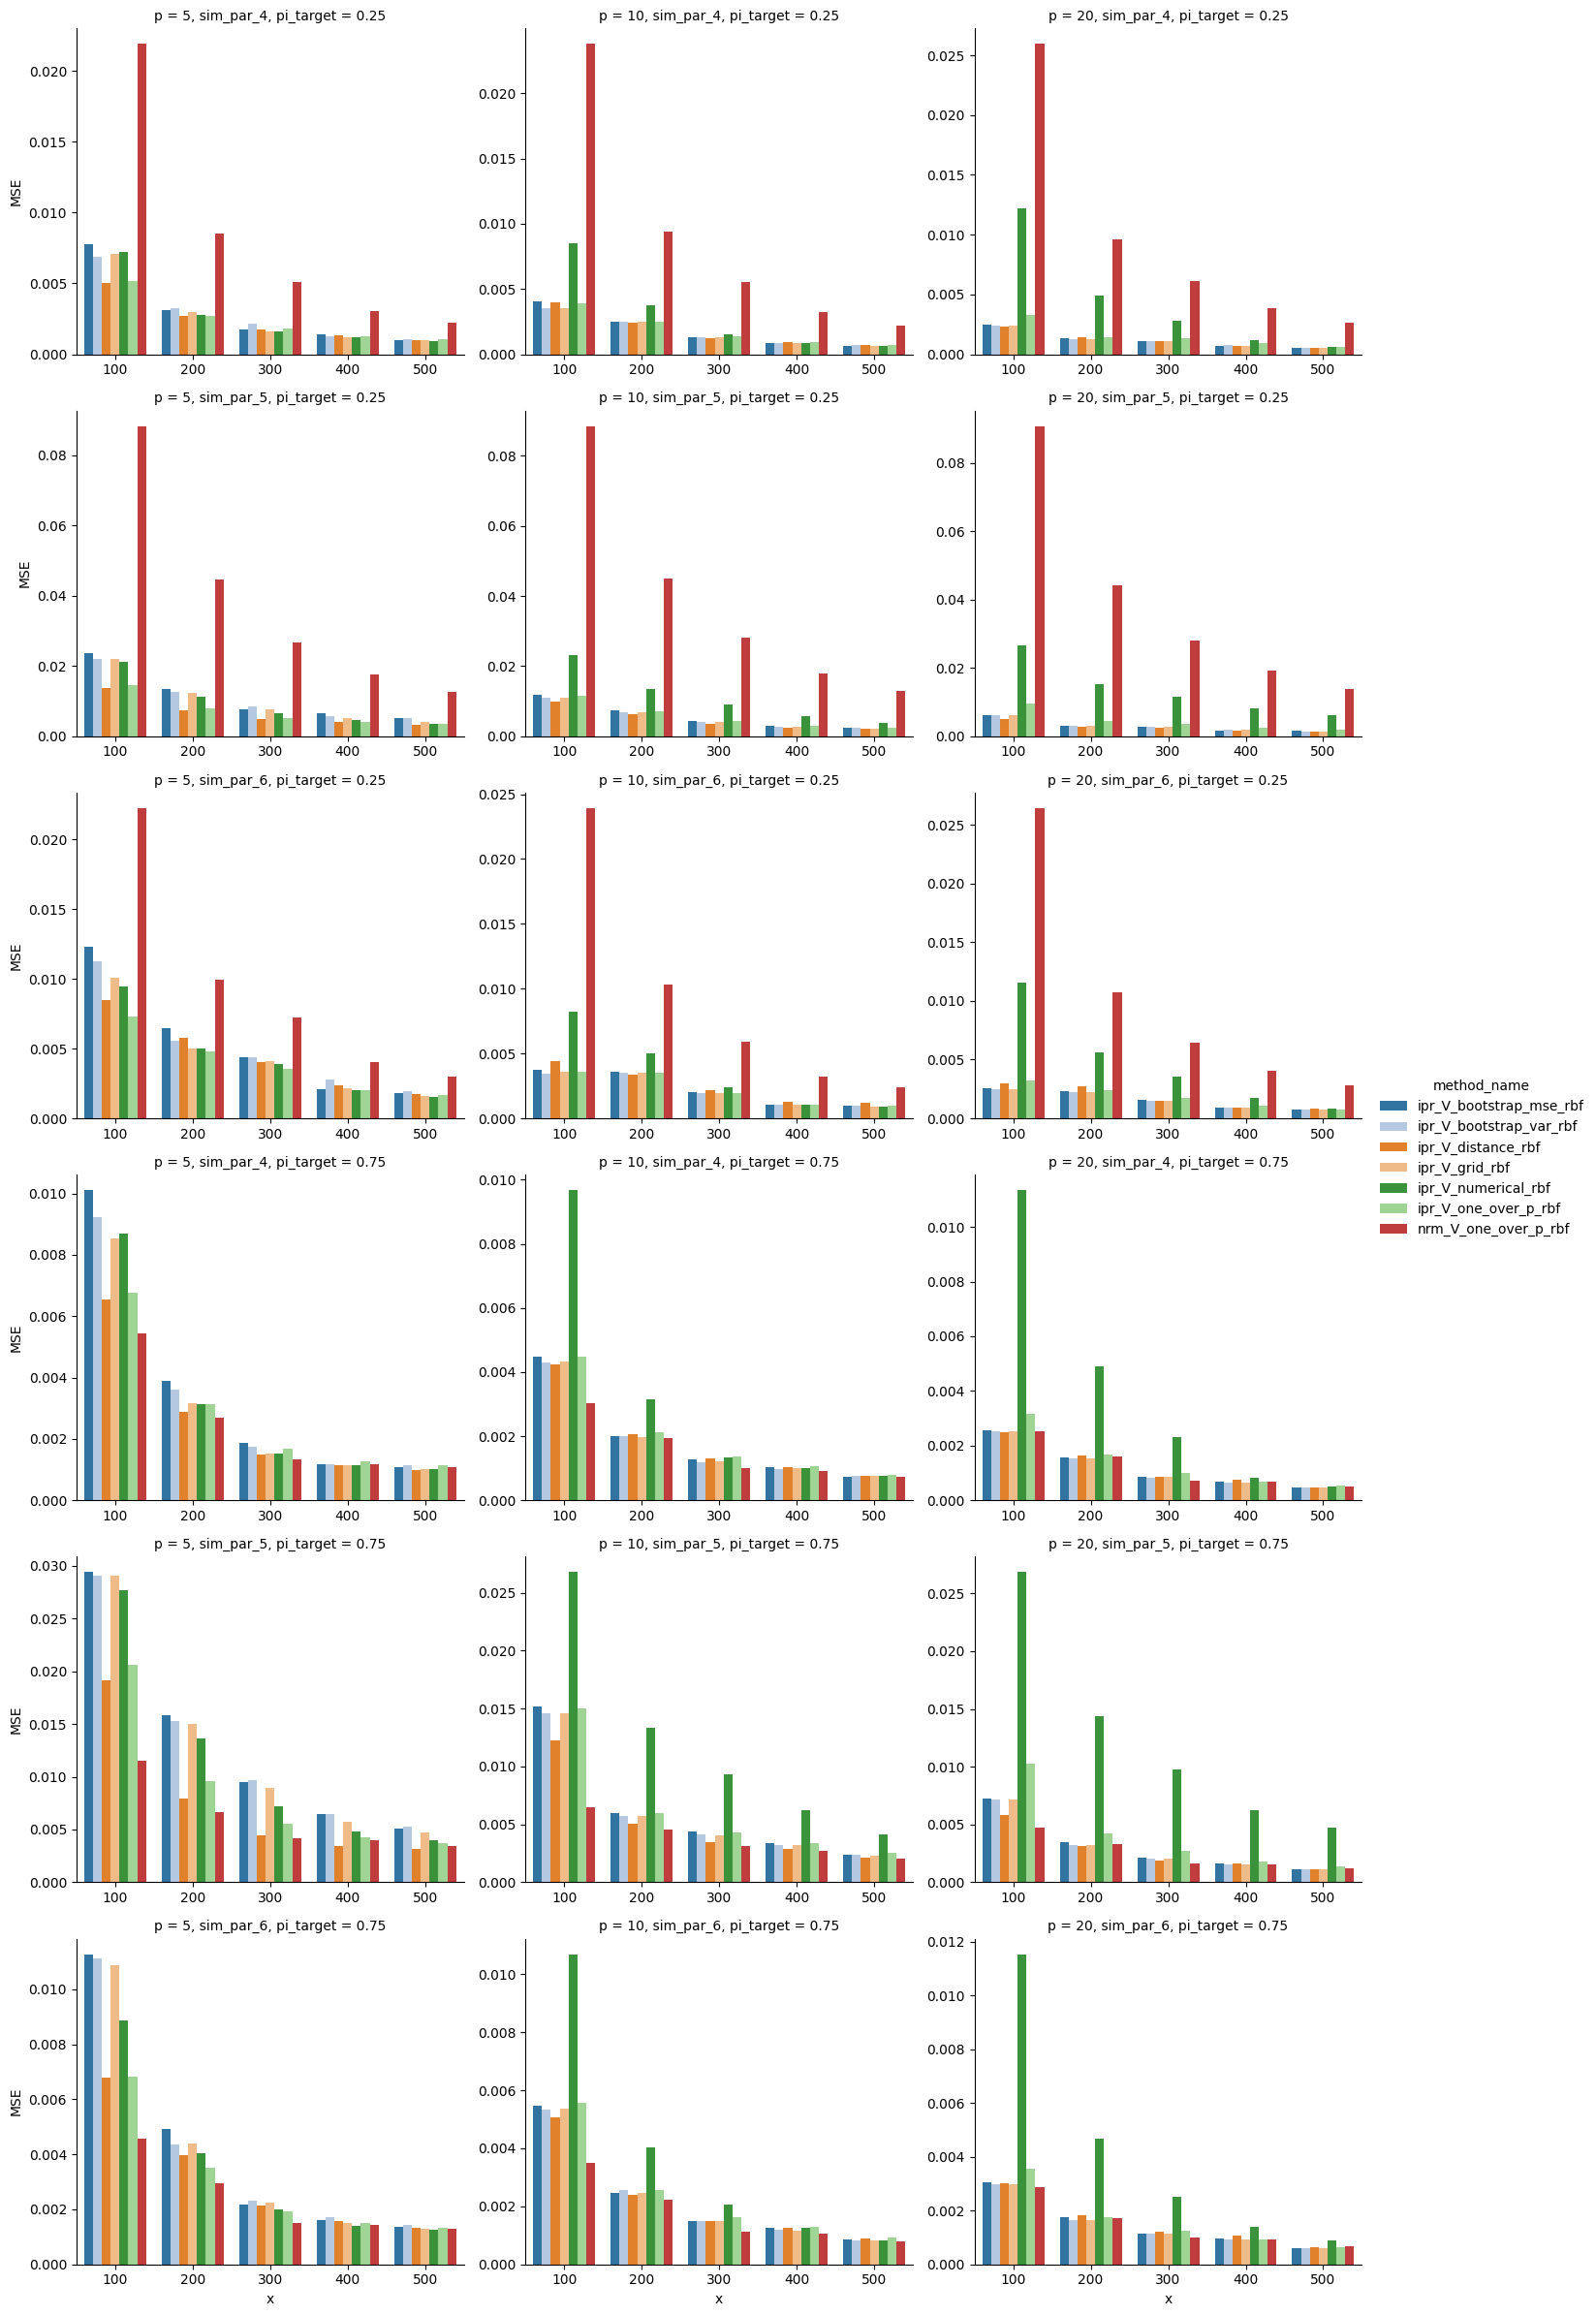

In [14]:
plot_mse(df_mse, ['V'])

### Figure 8

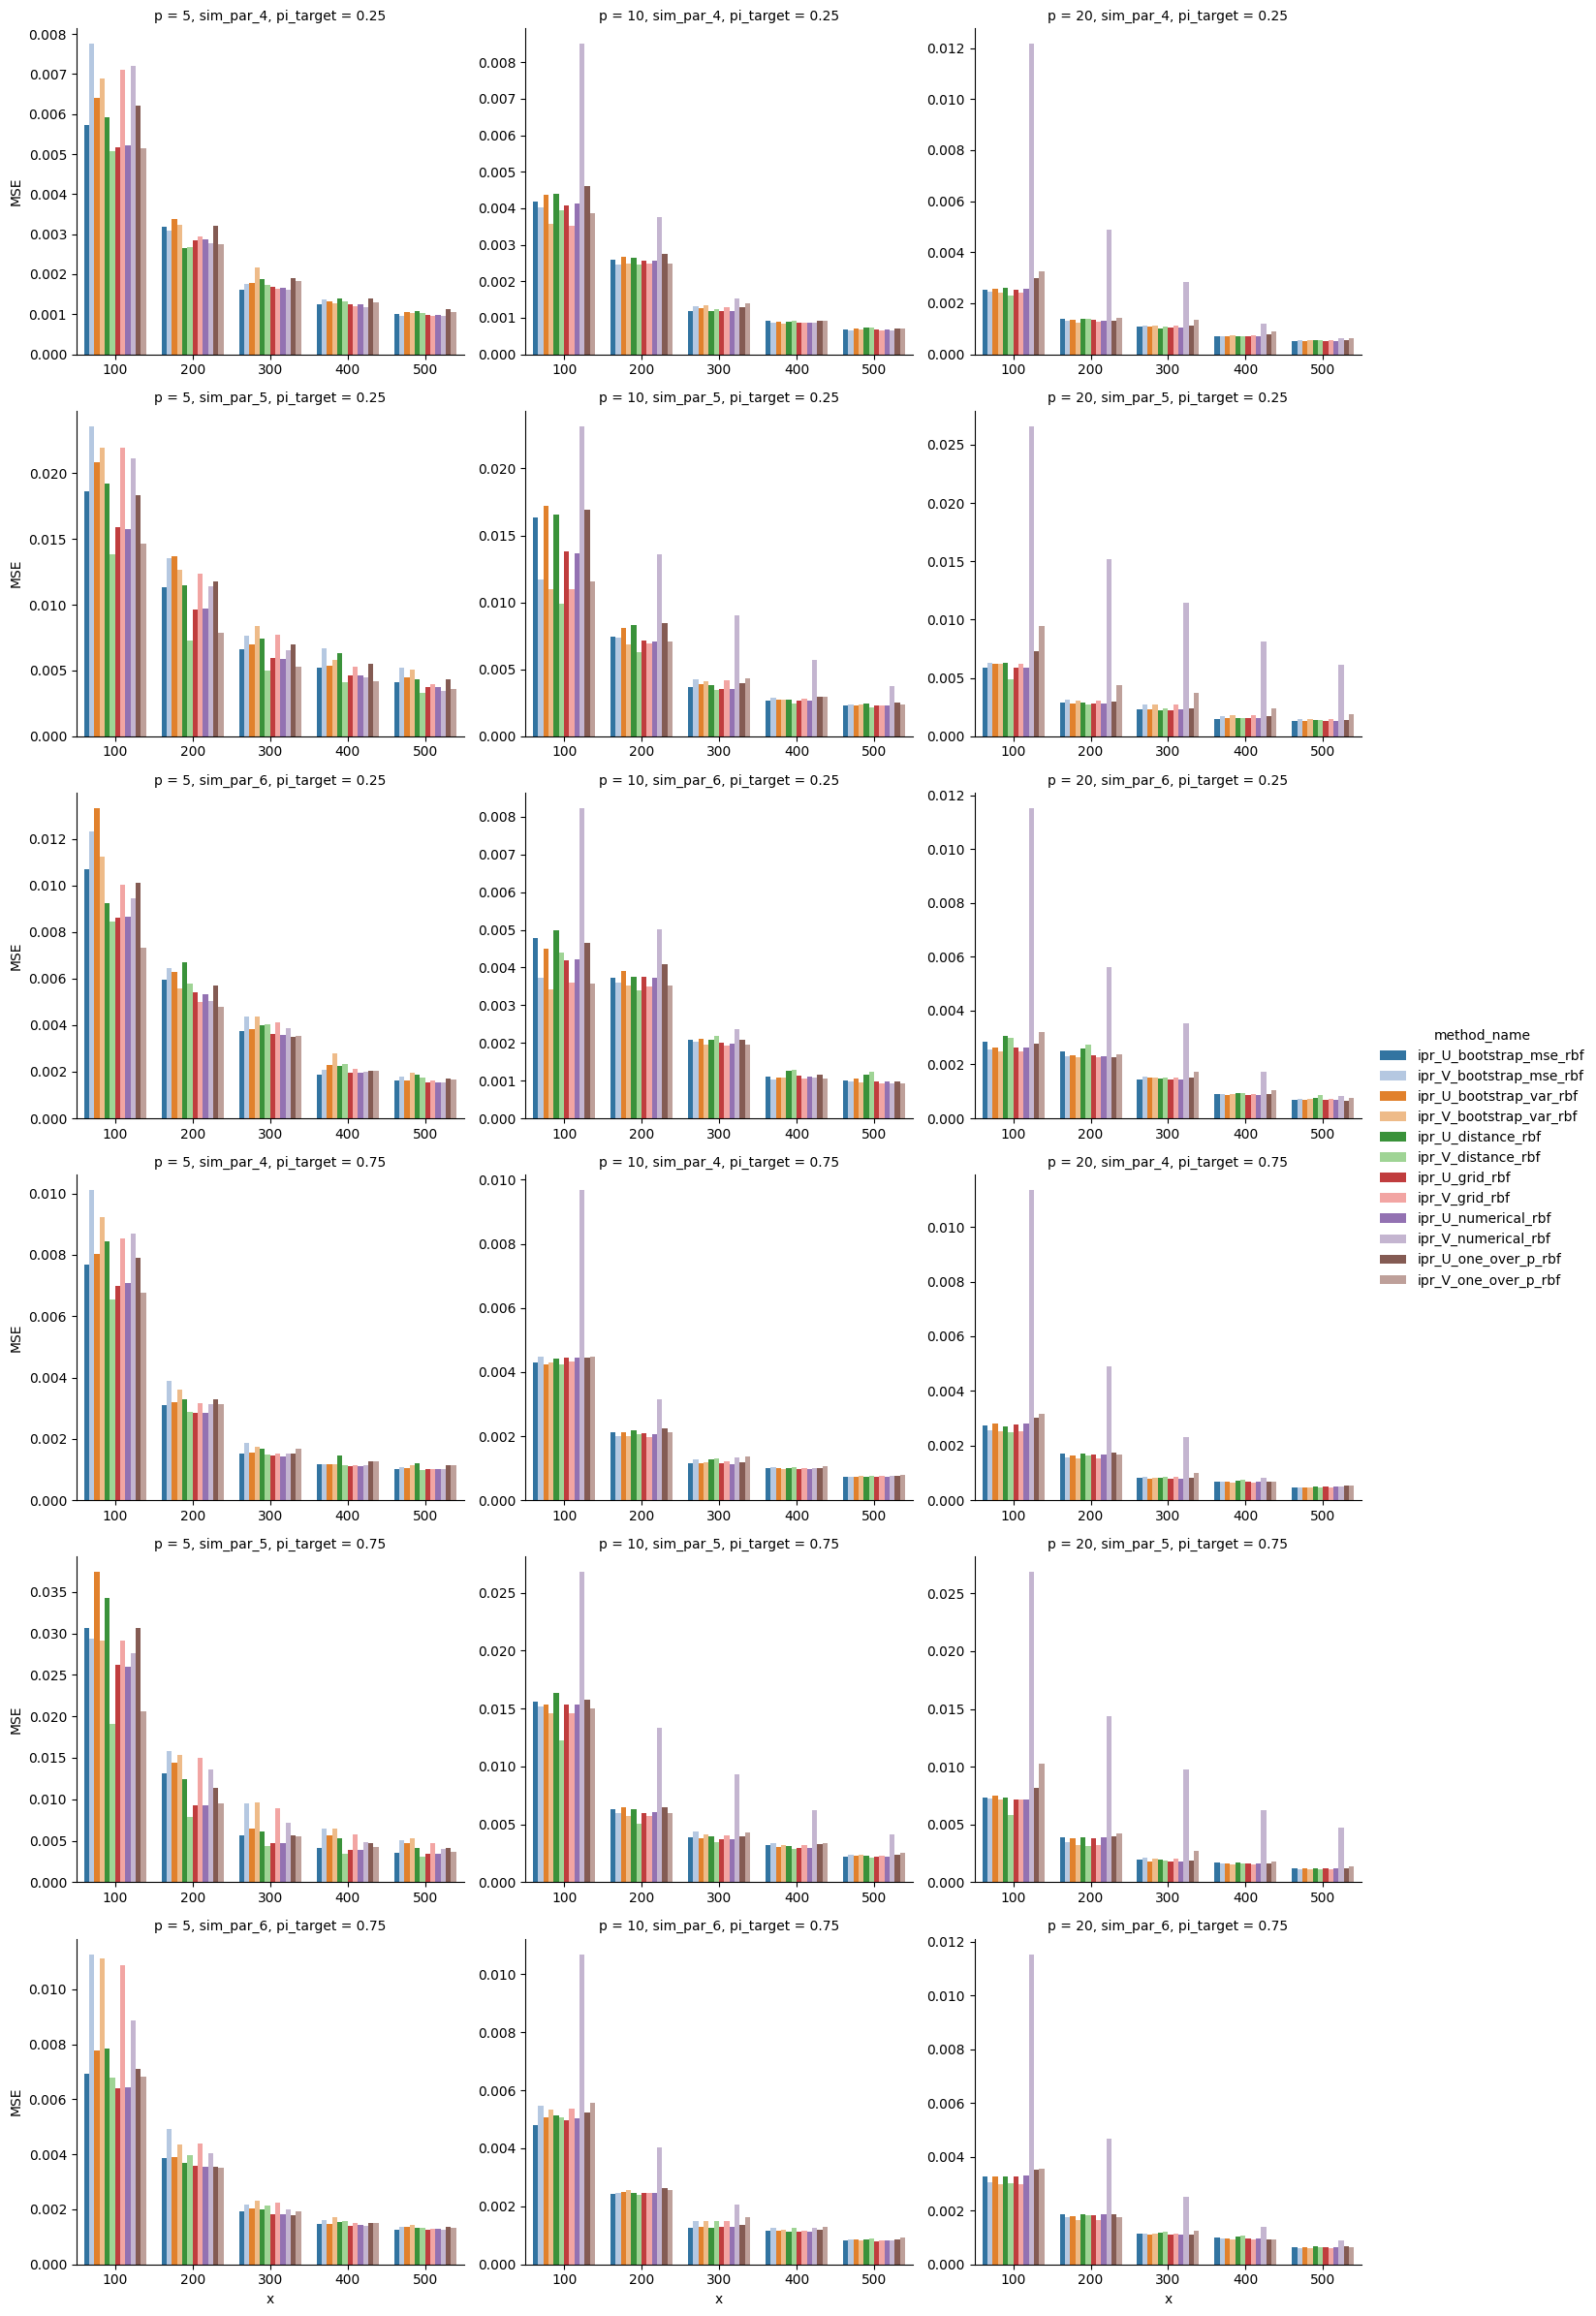

In [15]:
plot_mse(df_mse, ['U', 'V'], estimator=['ipr'])

## Heavy tail distribution

In [16]:
df_mse = pd.read_csv('results/results_heavy_tail_mse.csv', index_col=0)

### Figure 9

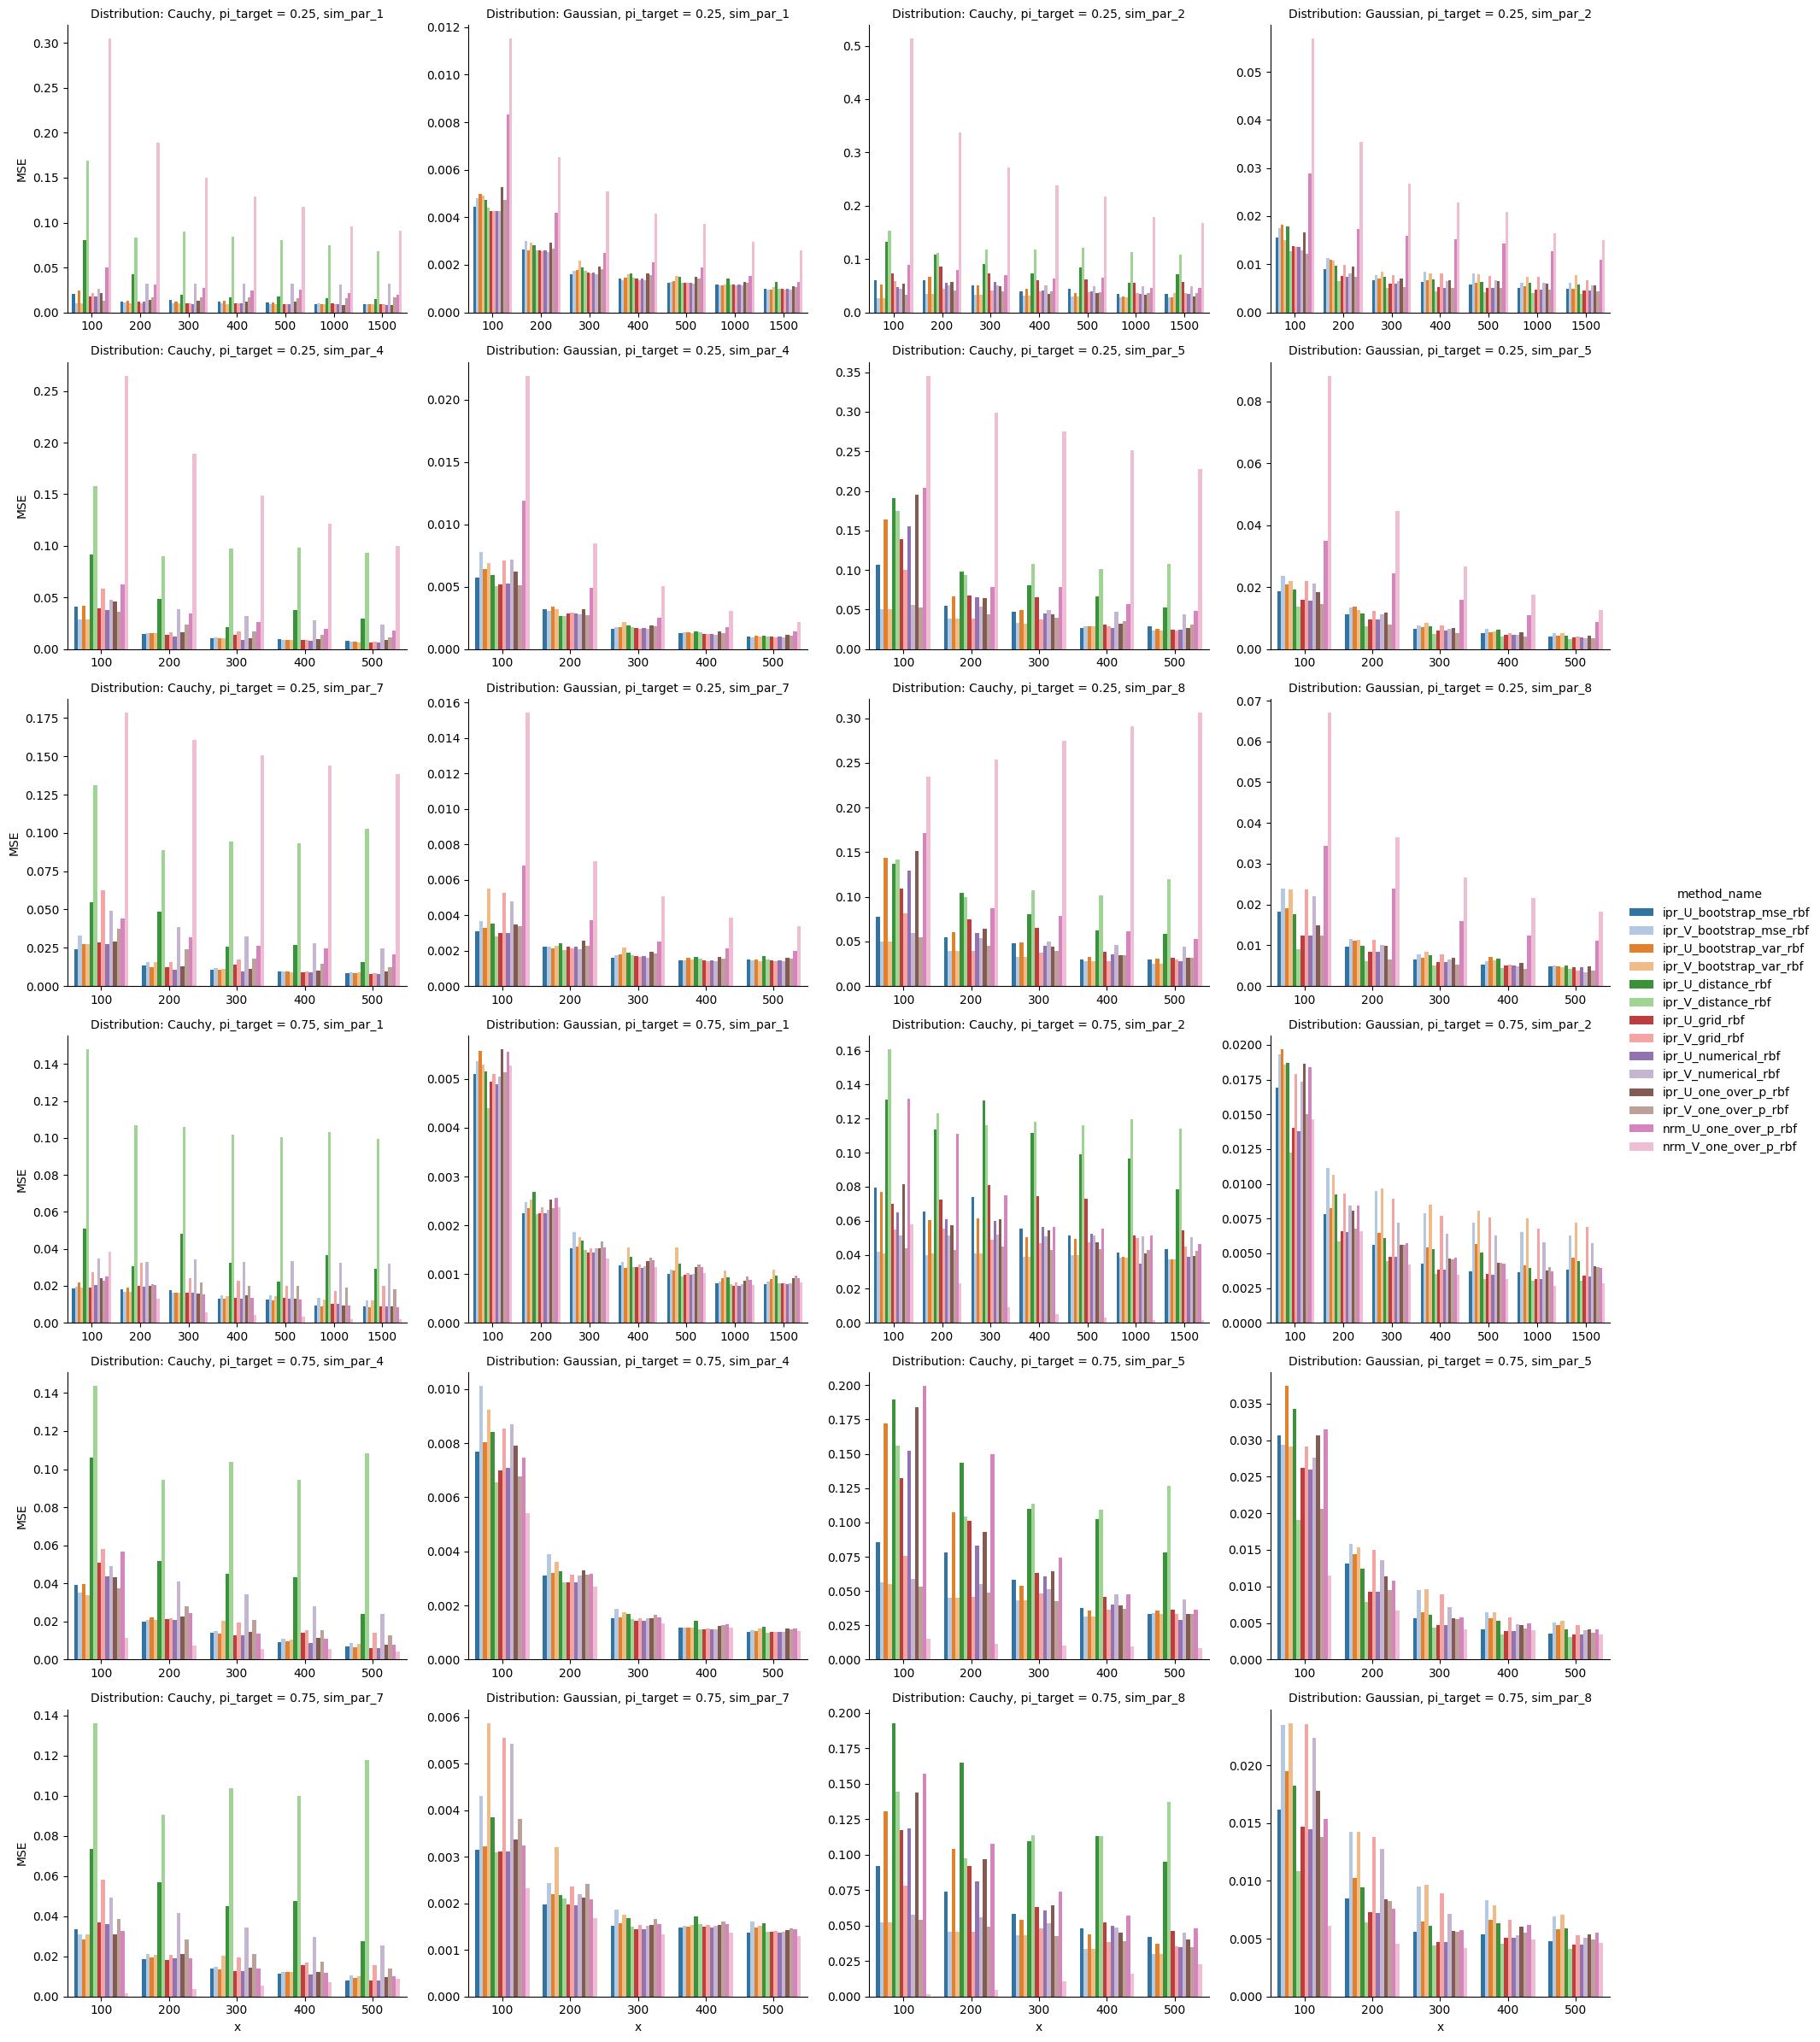

In [17]:
plot_mse(df_mse, ['U', 'V'], col_wrap=4)

# TIME

In [18]:
df = pd.read_csv('results/results_standard_all.csv', index_col=0)

In [19]:
df['log_time'] = np.log(df['time'])

In [20]:
df = df.sort_values(by=["pi_target", "sim_scenario"])
df['facet_blocks'] = df['sim_scenario'] + ", pi_target = " + df['pi_target'].astype(str)

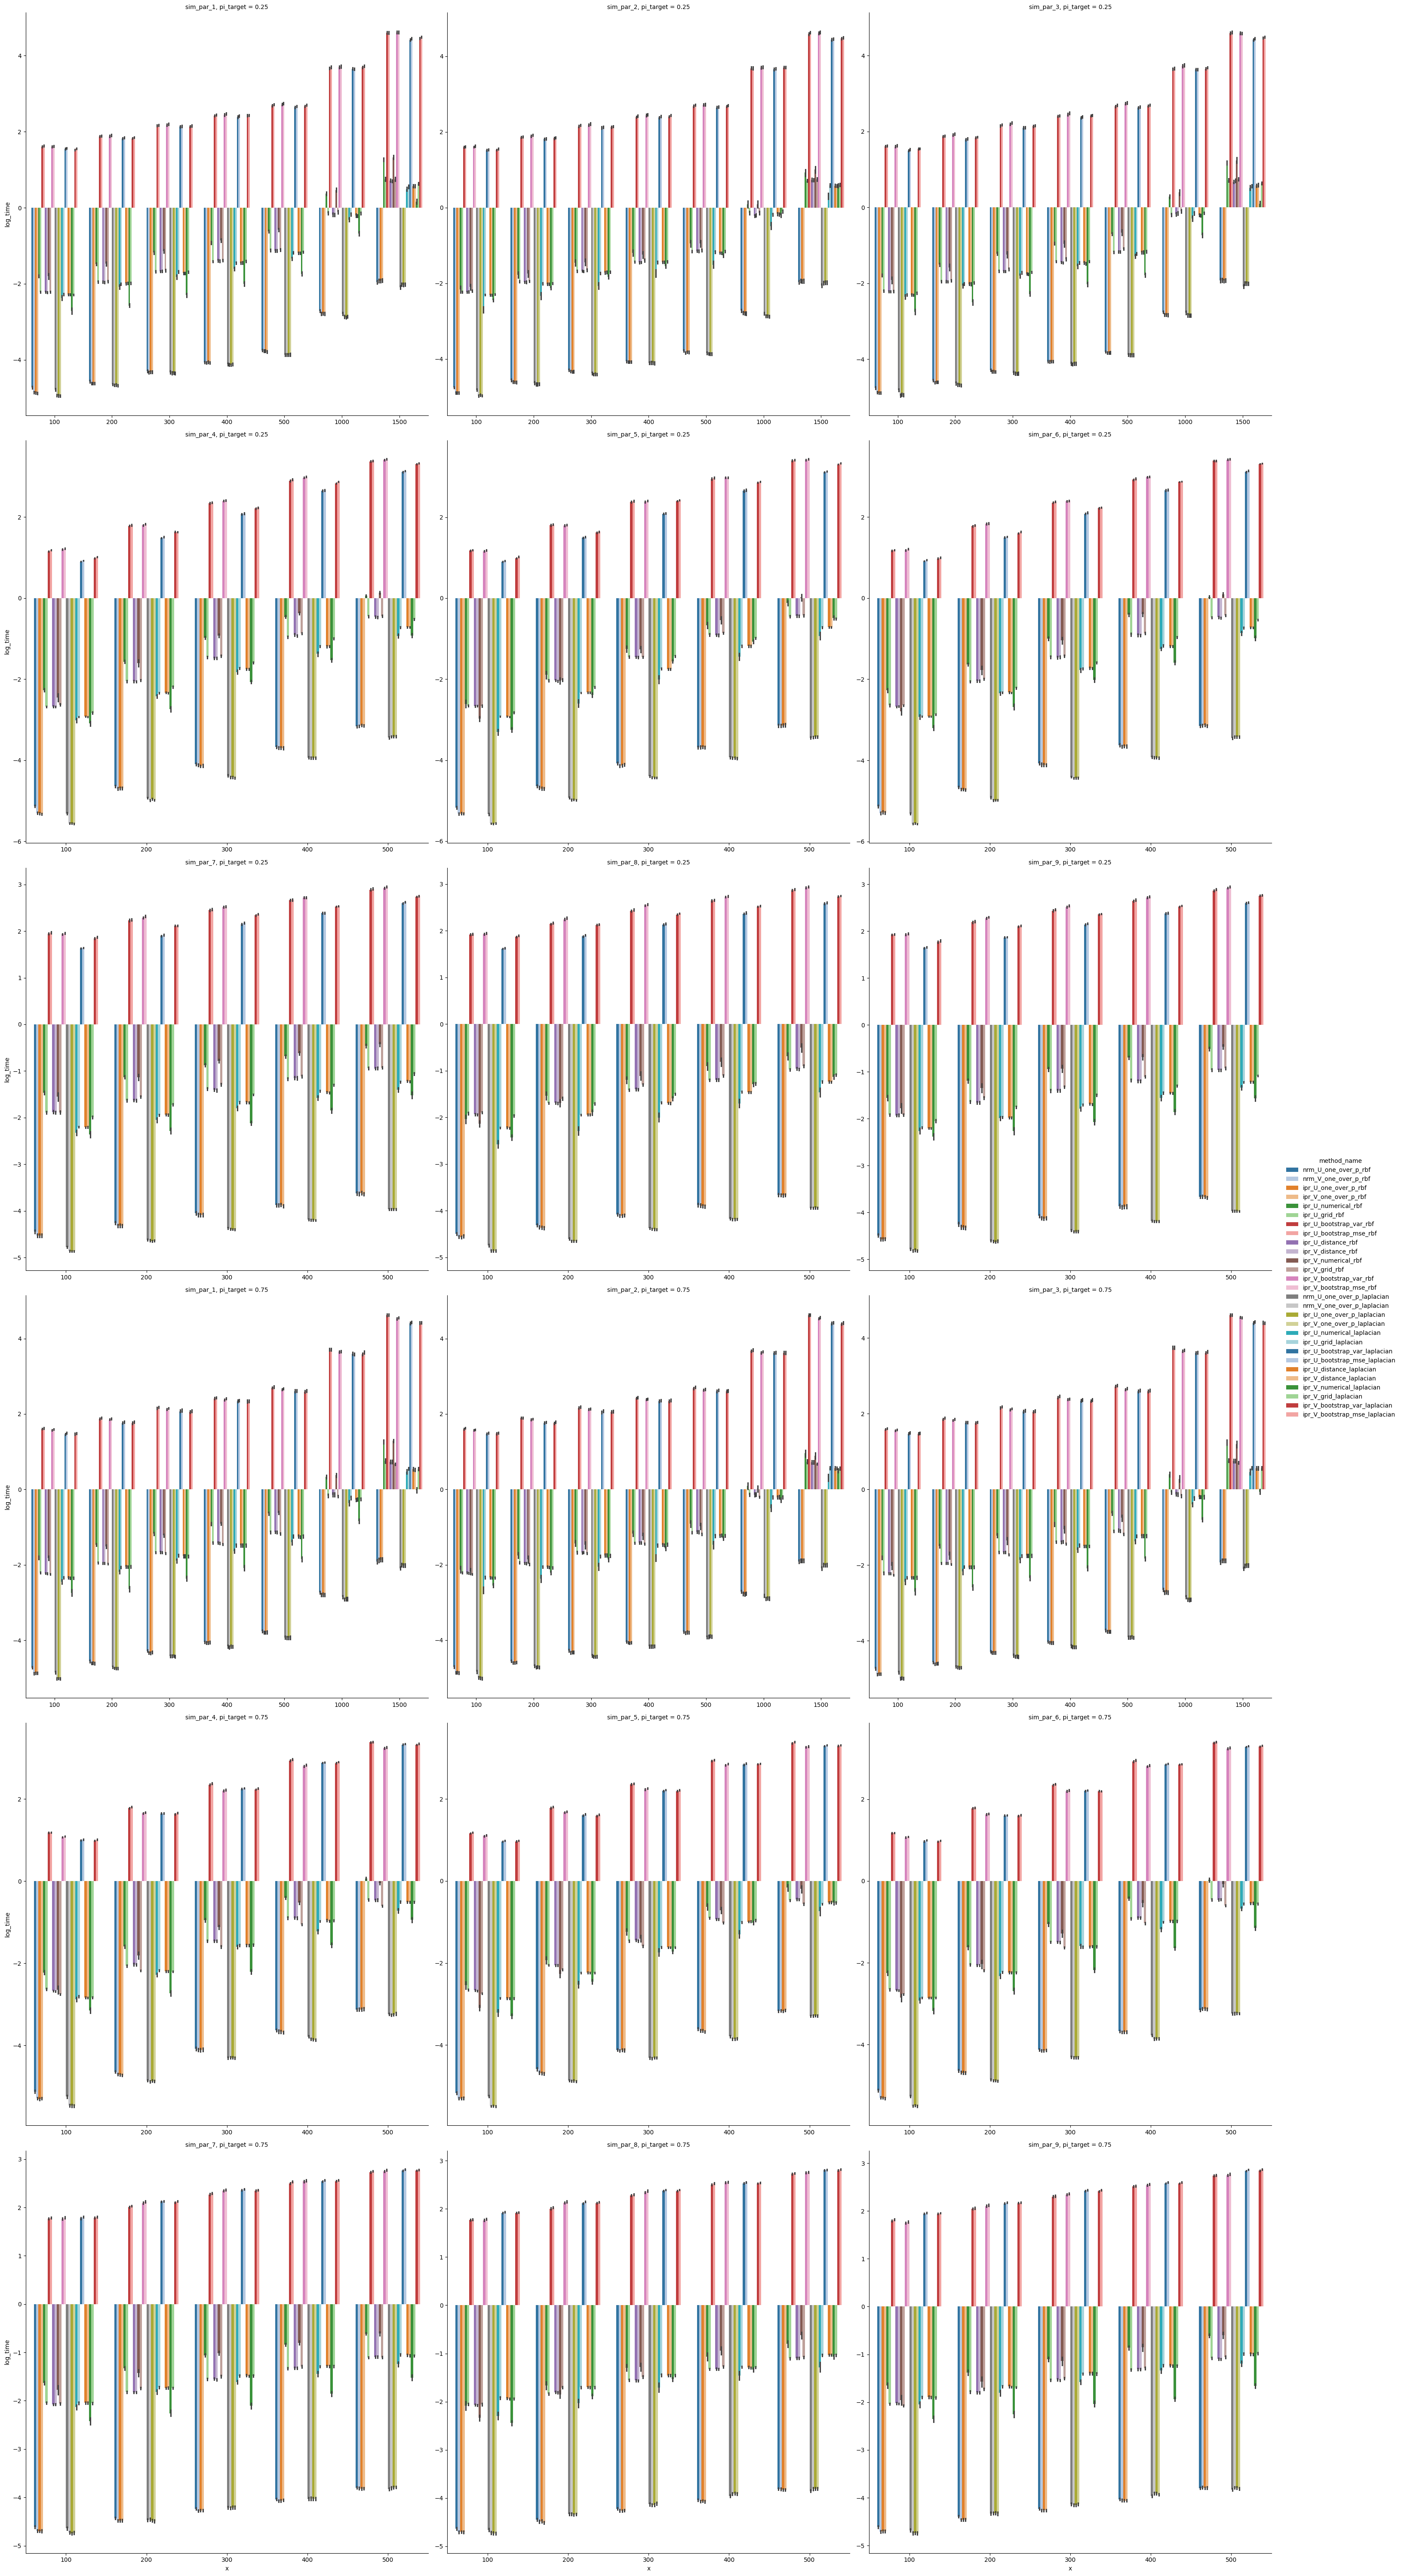

In [21]:
g = sns.catplot(data=df,
    x="x",  
    y="log_time",              
    hue="method_name",
    palette='tab20',
    col="facet_blocks",         
    kind="bar",
    height=10,
    # aspect=1.2,
    sharey=False,
    sharex=False,
    col_wrap=3
)
g.set_titles("{col_name}")
plt.show()

In [22]:
# df_time = df[(df['sim_scenario'] == 'sim_par_1') & (df['pi_target'] == 0.25)]

In [23]:
# df_time = df_time[['time', 'gamma_selection_name', 'type', 'n_target', 'estimator', 'kernel']].groupby(['gamma_selection_name', 'type', 'n_target', 'estimator', 'kernel']).agg('mean').reset_index()

In [24]:
# df_time['my_time'] = np.nan
# df_time.loc[df_time['gamma_selection_name'] == 'one_over_p', 'my_time'] = 1
# df_time.loc[df_time['gamma_selection_name'] == 'grid', 'my_time'] = 13 + 1
# df_time.loc[df_time['gamma_selection_name'] == 'bootstrap_var', 'my_time'] = 13*50 + 1
# df_time.loc[df_time['gamma_selection_name'] == 'bootstrap_mse', 'my_time'] = 13*50 + 50 + 1
# df_time.loc[df_time['gamma_selection_name'] == 'distance', 'my_time'] = 13 + 1

In [25]:
# for i in range(len(df_time)):
#     df_time['my_time'] = df_time['my_time']

In [26]:
# df_time['my_time'] = df_time['my_time']*0.03903

In [27]:
# df_time.loc[df_time['gamma_selection_name'] == 'one_over_p', 'time']

In [28]:
# sns.scatterplot(df_time, x='my_time', y='time')